<center>
<img src="https://wpsovet.ru/wp-content/uploads/1/6/4/1642a836ada1355f35ef577d9024a728.jpg" width="700"> 

# Андан на экономе: домашнее задание 2
</center>

**ФИО: Сокуров Рустам Астемирович**

**id из контеста: rasokurov@edu.hse.ru**

**Внимание, конкурс!** 

К сожалению, все мои любимый анекдоты нецензурные, поэтому тут я их писать не могу. Однако, чтобы поле не было пустым, оставлю короткий и добрый анекдот про чебурашку:

-- Чебурашка, сгоняй за пивом, башка трещит спасу нет! 

-- Обнаглел ты Гена, как за пивом бегать так Чебурашка, а как вчера другу налить так Жопа с ушами!

**Место для аника:**

## Общая информация


__Дата выдачи:__ 06.03.2023

__Мягкий дедлайн:__ 23:59MSK 02.04.2022

__Жесткий дедлайн:__ 23:59MSK 09.04.2022

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 100 баллов. За каждый день просрочки после мягкого дедлайна снимается 10 баллов. После жёсткого дедлайна работы не принимаются. Даже при опозданиии на одну секунду. Сдавайте работы заранее.

Мягкий дедлайн можно отодвинуть без потери баллов на 1,2 или 3 дня. Суммарно для откладывания в запасе есть три дня. Можно отодвинуть один дедлайн на три дня, а можно три дедлайна подвинуть на один день. Распоряжаться этими днями студент может как угодно. Жёсткий дедлайн, при этом, не меняется. Если такое произошло, нужно сообщить о сдвиге при сдаче работы.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Любой из студентов может быть вызван на защиту любого домашнего задания. В таком случае итоговая оценка студента определяется в результате защиты.

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено. Выводы должны быть релевантными. Не забывайте их писать. Если в вопросе требуется ответ словами, а его нет, вы будете терять довольно много баллов.

## Формат сдачи

Сам ноутбук называйте в формате hw-02-NUM-USERNAME.ipynb, где NUM — номер из вашего логина, а USERNAME — ваши фамилия и имя. Файл сдаётся в anytask.

Если хотите, можете разбить тетрадку на несколько разных для своего удобства.

In [1099]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# Часть 1: рисковая 

В этом задании мы немного поработаем с ценами на акции. За задание можно получить $50$ баллов.

В табличке `prices.tsv` лежат данные о том, как менялась цена на акции из индексов [S&P-500](https://ru.wikipedia.org/wiki/S%26P_500), [NASDAQ-100](https://ru.wikipedia.org/wiki/Nasdaq-100) и [DJI](https://ru.wikipedia.org/wiki/Промышленный_индекс_Доу_—_Джонса) в течение последних $10$ лет. В табличке `information.tsv` лежит дополнительная полезная информация по ценным бумагам. Подгрузим эти таблицы и посмотрим на них. 

In [1100]:
df_prices = pd.read_csv('https://raw.githubusercontent.com/hse-econ-data-science/andan_2023/main/hw/data/price.tsv', sep='\t')
df_prices = df_prices.drop('GEHC', axis=1) # сликом молодая компания
print(df_prices.shape)
df_prices.head()

(2518, 521)


,Date,A,AAL,AAP,AAPL,ABBV,ABC,ABNB,ABT,ACGL,...,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZS,ZTS
0,2013-03-05 00:00:00,27.946215,13.245518,71.640678,13.298839,24.972109,41.335518,NaN,28.678448,16.563334,...,58.596577,39.023003,24.914204,39.376095,67.826096,44.869999,20.423979,NaN,NaN,31.940346
1,2013-03-06 00:00:00,28.326160,13.735741,70.923820,13.129805,25.125229,41.515339,NaN,28.347576,16.583332,...,58.563908,39.283100,25.693598,39.738384,67.343094,44.790001,20.907482,NaN,NaN,31.530493
2,2013-03-07 00:00:00,28.332716,13.971428,70.961044,13.281566,24.958796,41.172813,NaN,28.479918,16.813334,...,58.008087,39.515335,24.870417,39.940308,66.985306,44.619999,21.057535,NaN,NaN,32.191845
3,2013-03-08 00:00:00,28.188597,14.065701,71.538284,13.316731,24.858923,41.515339,NaN,28.686729,16.879999,...,58.178085,39.701115,24.896696,40.219440,67.441467,45.040001,21.090885,NaN,NaN,31.754053
4,2013-03-11 00:00:00,28.044483,14.263680,72.180695,13.506428,25.078619,41.575287,NaN,28.893517,16.940001,...,58.302341,39.812572,25.185684,40.290707,67.745613,45.470001,21.365984,NaN,NaN,31.837889


In [1101]:
df_inf = pd.read_csv('https://raw.githubusercontent.com/hse-econ-data-science/andan_2023/main/hw/data/information.tsv', sep='\t')
print(df_inf.shape)
df_inf.head()

(525, 12)


,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded,S&P-500,NASDAQ,DJI
0,A,Agilent Technologies Inc,reports,Health Care,Health Care Equipment,"Santa Clara, California",05.06.00,1090872.0,1999.0,True,False,False
1,AAL,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",23.03.15,6201.0,1934.0,True,False,False
2,AAP,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Raleigh, North Carolina",09.07.15,1158449.0,1932.0,True,False,False
3,AAPL,Apple Inc.,reports,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",30.11.82,320193.0,1977.0,True,True,True
4,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",31.12.12,1551152.0,1888.0,True,False,False


## 1.1 Разогреваемся

__а) [0 баллов]__ В колонке `Date` лежит день, когда торговалась бумага. Сейчас у неё тип `string`. Превратите её в `datetime` и сделайте индексом таблицы.

In [1102]:
df_prices["Date"] = pd.to_datetime(df_prices['Date'])
df_prices.set_index('Date', inplace=True, drop=True)
print(df_prices.head())

                    A        AAL        AAP       AAPL       ABBV        ABC  \
Date                                                                           
2013-03-05  27.946215  13.245518  71.640678  13.298839  24.972109  41.335518   
2013-03-06  28.326160  13.735741  70.923820  13.129805  25.125229  41.515339   
2013-03-07  28.332716  13.971428  70.961044  13.281566  24.958796  41.172813   
2013-03-08  28.188597  14.065701  71.538284  13.316731  24.858923  41.515339   
2013-03-11  28.044483  14.263680  72.180695  13.506428  25.078619  41.575287   

            ABNB        ABT       ACGL        ACN  ...        XOM       XRAY  \
Date                                               ...                         
2013-03-05   NaN  28.678448  16.563334  63.810726  ...  58.596577  39.023003   
2013-03-06   NaN  28.347576  16.583332  64.217216  ...  58.563908  39.283100   
2013-03-07   NaN  28.479918  16.813334  64.349945  ...  58.008087  39.515335   
2013-03-08   NaN  28.686729  16.879999 

__б) [5 баллов]__ В колонках `'S&P-500', 'NASDAQ', 'DJI'` лежит True, если ценная бумага входит в соотвествующий индекс. Сколько ценных бумаг из таблицы входили в индекс NASDAQ? 

In [1103]:
df_inf['NASDAQ'].value_counts()

False    422
True     103
Name: NASDAQ, dtype: int64

***Отсюда, в индекс NASDAQ входят 103-и ценные бумаги***

Сколько ценных бумаг входят во все три индекса сразу?

In [1104]:
df_inindexes = df_inf[df_inf['S&P-500'] == True] #бумаги, которые входят в S&P500
df_inindexes = df_inindexes[df_inindexes['NASDAQ'] == True] #бумаги, которые входят в S&P500 и NASDAQ
df_inindexes = df_inindexes[df_inindexes['DJI'] == True] #бумаги, которые входят во все три индекса
print(df_inindexes)
print(df_inindexes.shape)

    Symbol                  Security SEC filings             GICS Sector  \
3     AAPL                Apple Inc.     reports  Information Technology   
119   CSCO             Cisco Systems     reports  Information Technology   
247   INTC               Intel Corp.     reports  Information Technology   
331   MSFT           Microsoft Corp.     reports  Information Technology   
496    WBA  Walgreens Boots Alliance     reports        Consumer Staples   

                              GICS Sub Industry    Headquarters Location  \
3    Technology Hardware, Storage & Peripherals    Cupertino, California   
119                    Communications Equipment     San Jose, California   
247                              Semiconductors  Santa Clara, California   
331                            Systems Software      Redmond, Washington   
496                                 Drug Retail      Deerfield, Illinois   

    Date first added        CIK  Founded  S&P-500  NASDAQ   DJI  
3           30.11.82

***Так как в датасете "df_inindexes" содержаться только тикеры, у которых 'True' по всем трем индексам, соответсвенно, количество тикеров этих компаний, а соответственно, количество строк этого датафрейма и есть количество компаний, входящих во все три индекса, то есть их 5***

В колонке `Founded` записан год основания компании. Сколько компаний из индекса S&P-500 были основаны в 19 веке (1900 год относится к 20 веку)? 

In [1105]:
df_inf[(df_inf['Founded']>=1800) & (df_inf['Founded']<1900)]

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded,S&P-500,NASDAQ,DJI
4,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",31.12.12,1551152.0,1888.0,True,False,False
7,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",31.03.64,1800.0,1888.0,True,False,False
20,AIZ,Assurant,reports,Financials,Multi-line Insurance,"New York, New York",10.04.07,1267238.0,1892.0,True,False,False
30,AMCR,Amcor plc,reports,Materials,Paper Packaging,"Warmley, Bristol, United Kingdom",07.06.19,1748790.0,1860.0,True,False,False
34,AMP,Ameriprise Financial,reports,Financials,Asset Management & Custody Banks,"Minneapolis, Minnesota",03.10.05,820027.0,1894.0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
494,WAB,Wabtec Corporation,reports,Industrials,Construction Machinery & Heavy Trucks,"Wilmerding, Pennsylvania",27.02.19,943452.0,1869.0,True,False,False
499,WEC,WEC Energy Group,reports,Utilities,Electric Utilities,"Milwaukee, Wisconsin",31.10.08,783325.0,1896.0,True,False,False
501,WFC,Wells Fargo,reports,Financials,Diversified Banks,"San Francisco, California",30.06.76,72971.0,1852.0,True,False,False
510,WU,Western Union Co,reports,Information Technology,Data Processing & Outsourced Services,"Englewood, Colorado",29.09.06,1365135.0,1851.0,True,False,False


***В данной таблице осталась информация только о компаниях, основанных в 19 веке. Так как строк 95, то и компаний 95***

В колонке `GICS Sector` находится сектор экономики, в котором работает компания. Сколько всего уникальных секторов представлено в данных?

In [1106]:
 df_inf['GICS Sector'].nunique()

11

***В таблице представленно 11 уникальных секторов***

Таблица с информацией устаревшая. Есть тикеры, которые попали в таблицу с ценами, но не попали в таблицу с информацией. Сколько таких тикеров? 

In [1107]:
a = set(df_prices.columns)
b = set(df_inf['Symbol'].to_numpy())
print(len(a-b))

58


***В переменной а содержится множество всех уникальных тикеров из таблицы с ценами, а в переменной b - из таблицы с информацией. вычитая из одного множества другое, получаем тикеры, попавшие в таблицу с ценами и непопавшие в таблицу с информацией. Их 58***

__в) [5 баллов]__ Сколько компаний из индекса S&P-500 в сумме приходится на $3$ самых крупных сектора?

*Для начала найдем, какие сектора являются самыми большими в данном случае:*

In [1108]:
df_inf_grouped_by_sector = df_inf.groupby('GICS Sector')['Symbol'].nunique().sort_values(ascending = False)
df_inf_grouped_by_sector

GICS Sector
Industrials               73
Information Technology    71
Financials                66
Health Care               62
Consumer Discretionary    61
Consumer Staples          33
Real Estate               31
Materials                 28
Utilities                 28
Communication Services    26
Energy                    26
Name: Symbol, dtype: int64

***Отсюда видно, что самыми крупными секторами являются "Industrials",  "Information Technology", "Financials"***

In [1109]:
df_inf[((df_inf['GICS Sector'] == 'Industrials') | (df_inf['GICS Sector'] == 'Information Technology') | (df_inf['GICS Sector'] == 'Financials')) & (df_inf['S&P-500'] == True)]

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded,S&P-500,NASDAQ,DJI
1,AAL,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",23.03.15,6201.0,1934.0,True,False,False
3,AAPL,Apple Inc.,reports,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",30.11.82,320193.0,1977.0,True,True,True
8,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",06.07.11,1467373.0,1989.0,True,False,False
9,ADBE,Adobe Inc.,reports,Information Technology,Application Software,"San Jose, California",05.05.97,796343.0,1982.0,True,True,False
10,ADI,"Analog Devices, Inc.",reports,Information Technology,Semiconductors,"Norwood, Massachusetts",12.10.99,6281.0,1965.0,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
514,XLNX,Xilinx,reports,Information Technology,Semiconductors,"San Jose, California",08.11.99,743988.0,1984.0,True,True,False
517,XRX,Xerox,reports,Information Technology,"Technology Hardware, Storage & Peripherals","Norwalk, Connecticut",NaN,108772.0,1906.0,True,False,False
518,XYL,Xylem Inc.,reports,Industrials,Industrial Machinery,"White Plains, New York",01.11.11,1524472.0,2011.0,True,False,False
521,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",23.12.19,877212.0,1969.0,True,False,False


In [1110]:
print(df_inf[((df_inf['GICS Sector'] == 'Industrials') | (df_inf['GICS Sector'] == 'Information Technology') | (df_inf['GICS Sector'] == 'Financials')) & (df_inf['S&P-500'] == True)].shape[0])

210


***Отсюда, 210 компаний из индекса S&P 500 в сумме приходятся на 3 самых крупных сектора***

__г) [5 баллов]__ Теперь поработаем со стоимостью акций. 

Выберите 5 случайных тикеров и постройте для них картинки с динамикой цен и гистограммы. Дайте ответы на вопросы:

- Распределение стоимости акций похоже на нормальное?
- Что происходило с финансовыми рынками в течение последних $10$ лет? Они росли? Они падали? Видно ли, что были кризисы? 

__Ответ:
Рассмотрим акции компаний полученных рандомных компаний.
Для этих акций распределение стоимости не похоже на нормальное. Оно часто больше похоже на экспоненциальное, особенно если компании американские и довольно известные, особенно, если они входят в индекс S&P500, так как наибольшее количество наблюдей стоимости сконцентрировано у наименьшей известной стоимости, далее с увеличением цены количество наблюдений экспоненциально уменьшается. Это рационально обоснуется тем фактом, что фондовый рынок в последние лет 10 рос взрыными темпами, отсюда и экспоненциальное распределение. Распределение же более мелких и менее известных компаний отдаленно может напоминать равномерное с существенными выьросами.
Говоря о том, что происходило за последние 10 лет, можно сказать что в целом рынок рос и достиг своего пика в конце 2020-ого года. Дальше на рынке началась рецессия. Наиболее заметно влияние рецессионых и инфляционных факторов на акциях наиболее рискованных, маленьких, инновационных компаний, одновременно с эти можно заметить, что на стабильных, фундаментальных, дивидендных компаниях настроения инвесторов сказываются меньше всего. Так, видно, что в 2022 начало мировой рецессии и повышения ставок ФРС больше всего отразилось на компаниях роста, тогда как на устойчивых это не отразилось почти никак. Также по падениям стоимости акций можно заметить спад 2020-ого года (ковид) - отчетливо видно падение по большинству представленных акций, которое отыгралсь буквально за следующие полгода__

In [1111]:
import random
random_tickers = random.sample(list(df_prices.columns), 5)
random_tickers

['VMC', 'ORLY', 'CPRT', 'JCI', 'WRK']

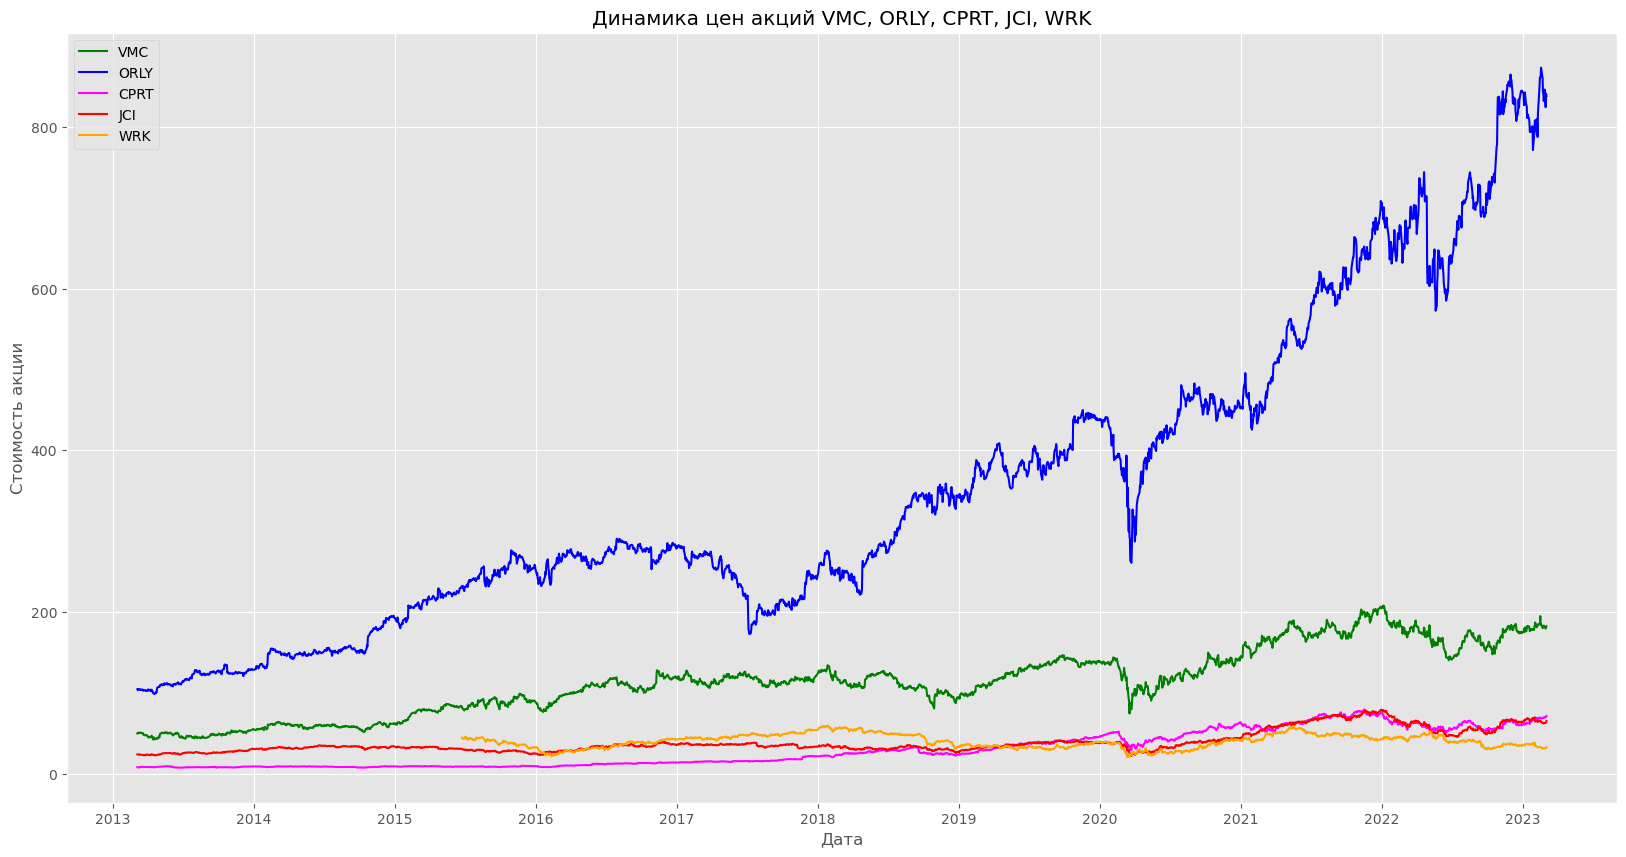

In [1112]:
y_for_0 = df_prices[random_tickers[0]].to_numpy()
y_for_1 = df_prices[random_tickers[1]].to_numpy()
y_for_2 = df_prices[random_tickers[2]].to_numpy()
y_for_3 = df_prices[random_tickers[3]].to_numpy()
y_for_4 = df_prices[random_tickers[4]].to_numpy()
x = df_prices.index
plt.figure(figsize=(20,10))
plt.title(f'Динамика цен акций { random_tickers[0] }, { random_tickers[1] }, { random_tickers[2] }, { random_tickers[3] }, { random_tickers[4] }')
plt.xlabel('Дата')
plt.ylabel('Стоимость акции')
plt.plot(x, y_for_0, color = 'green', label = random_tickers[0])
plt.plot(x, y_for_1, color = 'blue', label = random_tickers[1])
plt.plot(x, y_for_2, color = 'fuchsia', label = random_tickers[2])
plt.plot(x, y_for_3, color = 'red', label = random_tickers[3])
plt.plot(x, y_for_4, color = 'orange', label = random_tickers[4])
plt.legend();

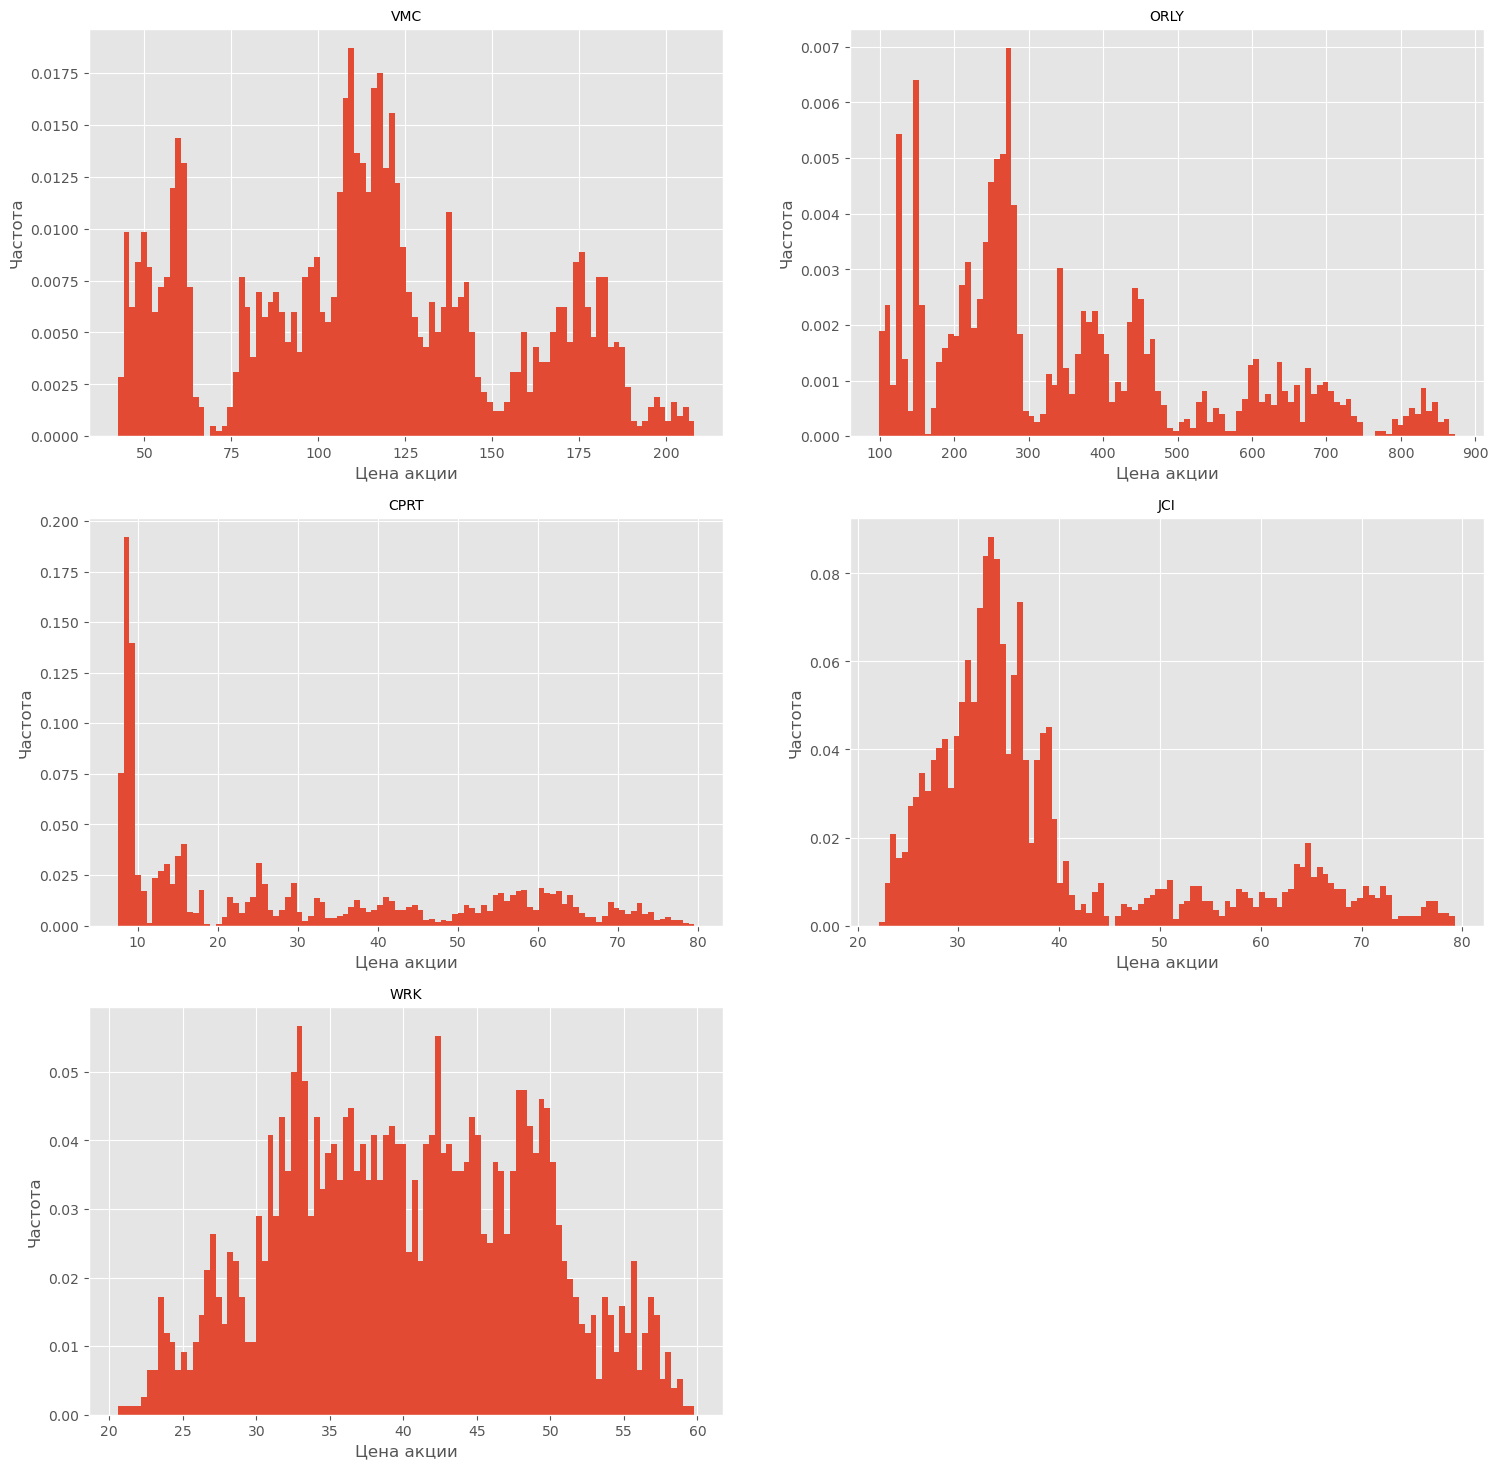

In [1113]:
plt.figure(figsize=(18, 18))

plt.subplot(3, 2, 1)
plt.title(random_tickers[0], fontsize = 10)
plt.hist(y_for_0, bins=100, density=True)
plt.ylabel('Частота')
plt.xlabel('Цена акции')

plt.subplot(3, 2, 2)
plt.title(random_tickers[1], fontsize = 10)
plt.hist(y_for_1, bins=100, density=True)
plt.ylabel('Частота')
plt.xlabel('Цена акции')


plt.subplot(3, 2, 3)
plt.title(random_tickers[2], fontsize = 10)
plt.hist(y_for_2, bins=100, density=True)
plt.ylabel('Частота')
plt.xlabel('Цена акции')


plt.subplot(3, 2, 4)
plt.title(random_tickers[3], fontsize = 10)
plt.hist(y_for_3, bins=100, density=True)
plt.ylabel('Частота')
plt.xlabel('Цена акции')


plt.subplot(3, 2, 5)
plt.title(random_tickers[4], fontsize = 10)
plt.hist(y_for_4, bins=100, density=True)
plt.ylabel('Частота')
plt.xlabel('Цена акции')


plt.show()

__д) [5 баллов]__ Найдите медианную цену акций за прошедший год (НЕ 10 лет) для каждого тикера. Сделайте `left join` таблицы с медианными ценами и таблицы с секторами экономики. Найдите для каждого сектора $95\%$ квантиль медианной цены.

In [1114]:
med_meaning = df_prices.loc['2022-01-01':'2023-01-01'].median() #нахожу медианные значения
df_median = pd.DataFrame({'median' : med_meaning}) #делаю из них датафрейм

In [1115]:
df_median['symbol'] = df_median.index #создаю колонку 'symbol', чтобы потом без проблем замерджить
df_median = pd.merge(df_median, df_inf, left_on='symbol', right_on='Symbol', how='left') #мерджу

In [1116]:
df_median.groupby('GICS Sector')['median'].quantile(q=0.95) #группирую акции по сектору и нахожу медианную цену

GICS Sector
Communication Services     260.027003
Consumer Discretionary    1760.140015
Consumer Staples           246.914078
Energy                     159.902217
Financials                 354.431122
Health Care                523.427579
Industrials                427.725174
Information Technology     419.005197
Materials                  284.315181
Real Estate                316.791876
Utilities                  140.414839
Name: median, dtype: float64

__Анекдот__

***Внимание!*** 

*Анекдот нецензурный. Переходя по данной ссылке вы подтверждаете свое личное желание прочитать анекдот и отказываетесь от любого рода претензий. Анекдот не несет цели кого-то обидеть, оскорбить, не передает личного отноения и не несет скрытого подтекста*

https://pastebin.com/dhArz4fG

## 1.2 Риск и доходность

__е) [5 баллов]__ Финансовые продукты описываются двумя характеристикам – __доходностью__ и __риском.__ Доходность – это процентное изменение стоимости за некоторый промежуток времени. Мы будем работать с доходностями за день: 

$$
R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
$$

Перейдите к доходностям для всей таблицы `df_prices`. Для того, чтобы посчитать разность между каждой строкой таблицы и предыдущей строкой, используйте команду `.diff()`. Чтобы сдвинуть все строки на одну вниз, используйте команду `shift(1)`.  

Поделите результат работы команды `diff` на результат работы команды `shift`. Обратите внимание, что в первой колонке теперь все значения `NaN`, так как мы не можем посчитать доходность для самого первого дня. Удалите из таблицы эту строку. 

In [1117]:
df_r = df_prices.diff()/df_prices.shift(1) #считаю доходность
df_r = df_r.drop(['2013-03-05'], axis=0) #удаляю первый столбец без значений
df_r

,A,AAL,AAP,AAPL,ABBV,ABC,ABNB,ABT,ACGL,ACN,...,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZS,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2013-03-06,0.013596,0.037010,-0.010006,-0.012710,0.006132,0.004350,NaN,-0.011537,0.001207,0.006370,...,-0.000558,0.006665,0.031283,0.009201,-0.007121,-0.001783,0.023673,NaN,NaN,-0.012832
2013-03-07,0.000231,0.017159,0.000525,0.011559,-0.006624,-0.008251,NaN,0.004669,0.013869,0.002067,...,-0.009491,0.005912,-0.032038,0.005081,-0.005313,-0.003796,0.007177,NaN,NaN,0.020975
2013-03-08,-0.005087,0.006748,0.008135,0.002648,-0.004001,0.008319,NaN,0.007262,0.003965,0.010056,...,0.002931,0.004701,0.001057,0.006989,0.006810,0.009413,0.001584,NaN,NaN,-0.013599
2013-03-11,-0.005112,0.014075,0.008980,0.014245,0.008838,0.001444,NaN,0.007208,0.003555,-0.000638,...,0.002136,0.002807,0.011607,0.001772,0.004510,0.009547,0.013043,NaN,NaN,0.002640
2013-03-12,-0.004439,0.024455,-0.002193,-0.021559,-0.013273,0.002060,NaN,0.001432,-0.000197,-0.003576,...,0.000000,-0.002567,-0.007998,0.013119,0.006073,0.001100,-0.006243,NaN,NaN,-0.010533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-27,0.006940,0.004499,0.012820,0.008248,0.010281,-0.012234,0.006108,-0.006868,0.000578,-0.001051,...,-0.001806,0.006408,0.001465,-0.002050,0.004890,0.014764,0.002387,-0.002841,0.007335,-0.005170
2023-02-28,-0.001477,0.022393,0.030790,-0.003448,-0.002463,-0.006831,-0.002024,0.019545,0.011415,-0.002629,...,-0.005789,0.101881,0.000975,0.004661,0.004623,0.013570,0.004564,0.011801,-0.005234,0.009246
2023-03-01,-0.031415,0.003129,-0.042357,-0.014246,0.008902,0.006107,-0.019873,-0.008750,0.013857,-0.007381,...,0.008916,-0.018650,-0.015197,-0.007550,-0.014451,0.006961,-0.003556,-0.066631,-0.020663,0.003413


Постройте для 5 случайно выбранных тикеров картинку с динамикой доходностей, гистограмму доходностей и ящики с усами. Ответьте на следующие вопроcы:

- Имеют ли доходности по акциям нормальное распределение? 
- Видно ли по ящику с усами, что в данных довольно много выбросов? 

__Ответ: да, доходности имеют нормальное распределение, по ящикам с усами это видно (более развернутый ответ сразу после графиков, чтобы было нагляднее)__

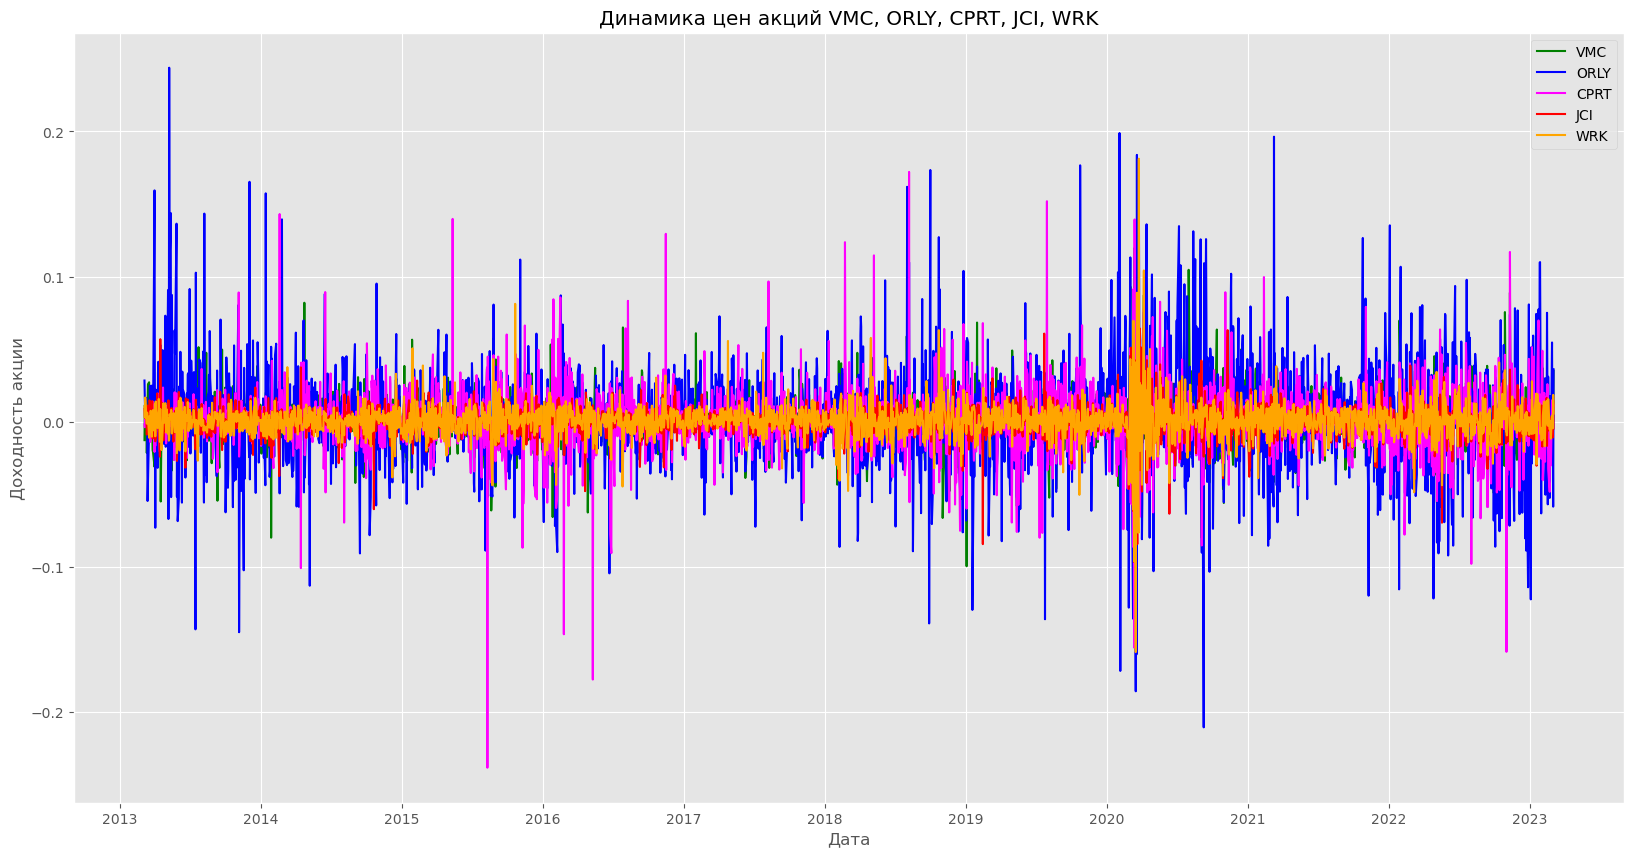

In [1118]:
y_for_0 = df_r[random_tickers[0]].to_numpy() #перевожу все доходности в удобный вид
y_for_1 = df_r[random_tickers[1]].to_numpy()
y_for_2 = df_r[random_tickers[2]].to_numpy()
y_for_3 = df_r[random_tickers[3]].to_numpy()
y_for_4 = df_r[random_tickers[4]].to_numpy()

x = df_r.index
plt.style.use('ggplot') 
%matplotlib inline
plt.figure(figsize=(20,10))
plt.title(f'Динамика цен акций { random_tickers[0] }, { random_tickers[1] }, { random_tickers[2] }, { random_tickers[3] }, { random_tickers[4] }')
plt.xlabel('Дата')
plt.ylabel('Доходность акции')
plt.plot(x, y_for_apple, color = 'green', label = random_tickers[0])
plt.plot(x, y_for_tesla, color = 'blue', label = random_tickers[1])
plt.plot(x, y_for_zebra, color = 'fuchsia', label = random_tickers[2])
plt.plot(x, y_for_cola, color = 'red', label = random_tickers[3])
plt.plot(x, y_for_mac, color = 'orange', label = random_tickers[4])
plt.legend();

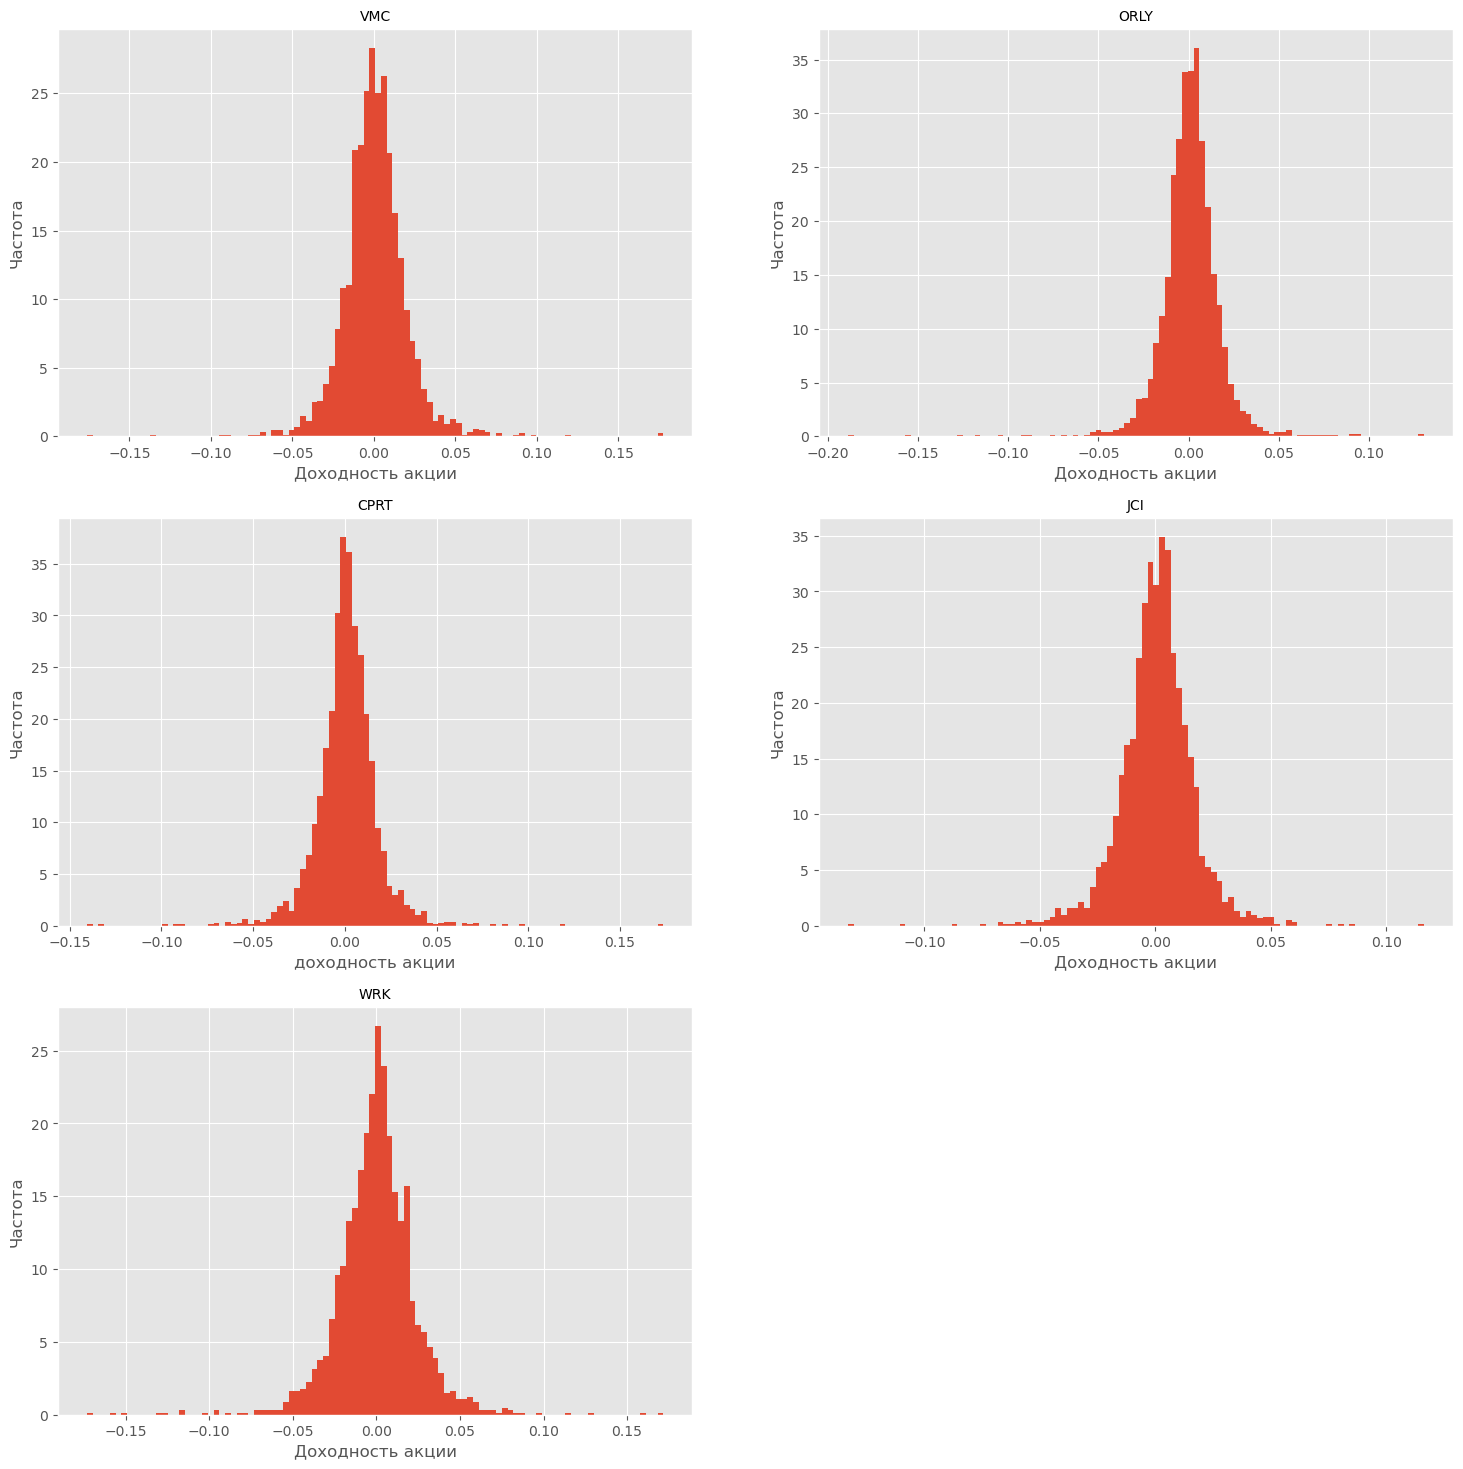

In [1119]:
plt.figure(figsize=(18, 18))

plt.subplot(3, 2, 1)
plt.title(random_tickers[0], fontsize = 10)
plt.hist(y_for_0, bins=100, density=True)
plt.ylabel('Частота')
plt.xlabel('Доходность акции')

plt.subplot(3, 2, 2)
plt.title(random_tickers[1], fontsize = 10)
plt.hist(y_for_1, bins=100, density=True)
plt.ylabel('Частота')
plt.xlabel('Доходность акции')


plt.subplot(3, 2, 3)
plt.title(random_tickers[2], fontsize = 10)
plt.hist(y_for_2, bins=100, density=True)
plt.ylabel('Частота')
plt.xlabel('доходность акции')


plt.subplot(3, 2, 4)
plt.title(random_tickers[3], fontsize = 10)
plt.hist(y_for_3, bins=100, density=True)
plt.ylabel('Частота')
plt.xlabel('Доходность акции')


plt.subplot(3, 2, 5)
plt.title(random_tickers[4], fontsize = 10)
plt.hist(y_for_4, bins=100, density=True)
plt.ylabel('Частота')
plt.xlabel('Доходность акции')


plt.show()

***Да, по графикам видно, что распределение доходностей действительно имеет нормальное распределение***

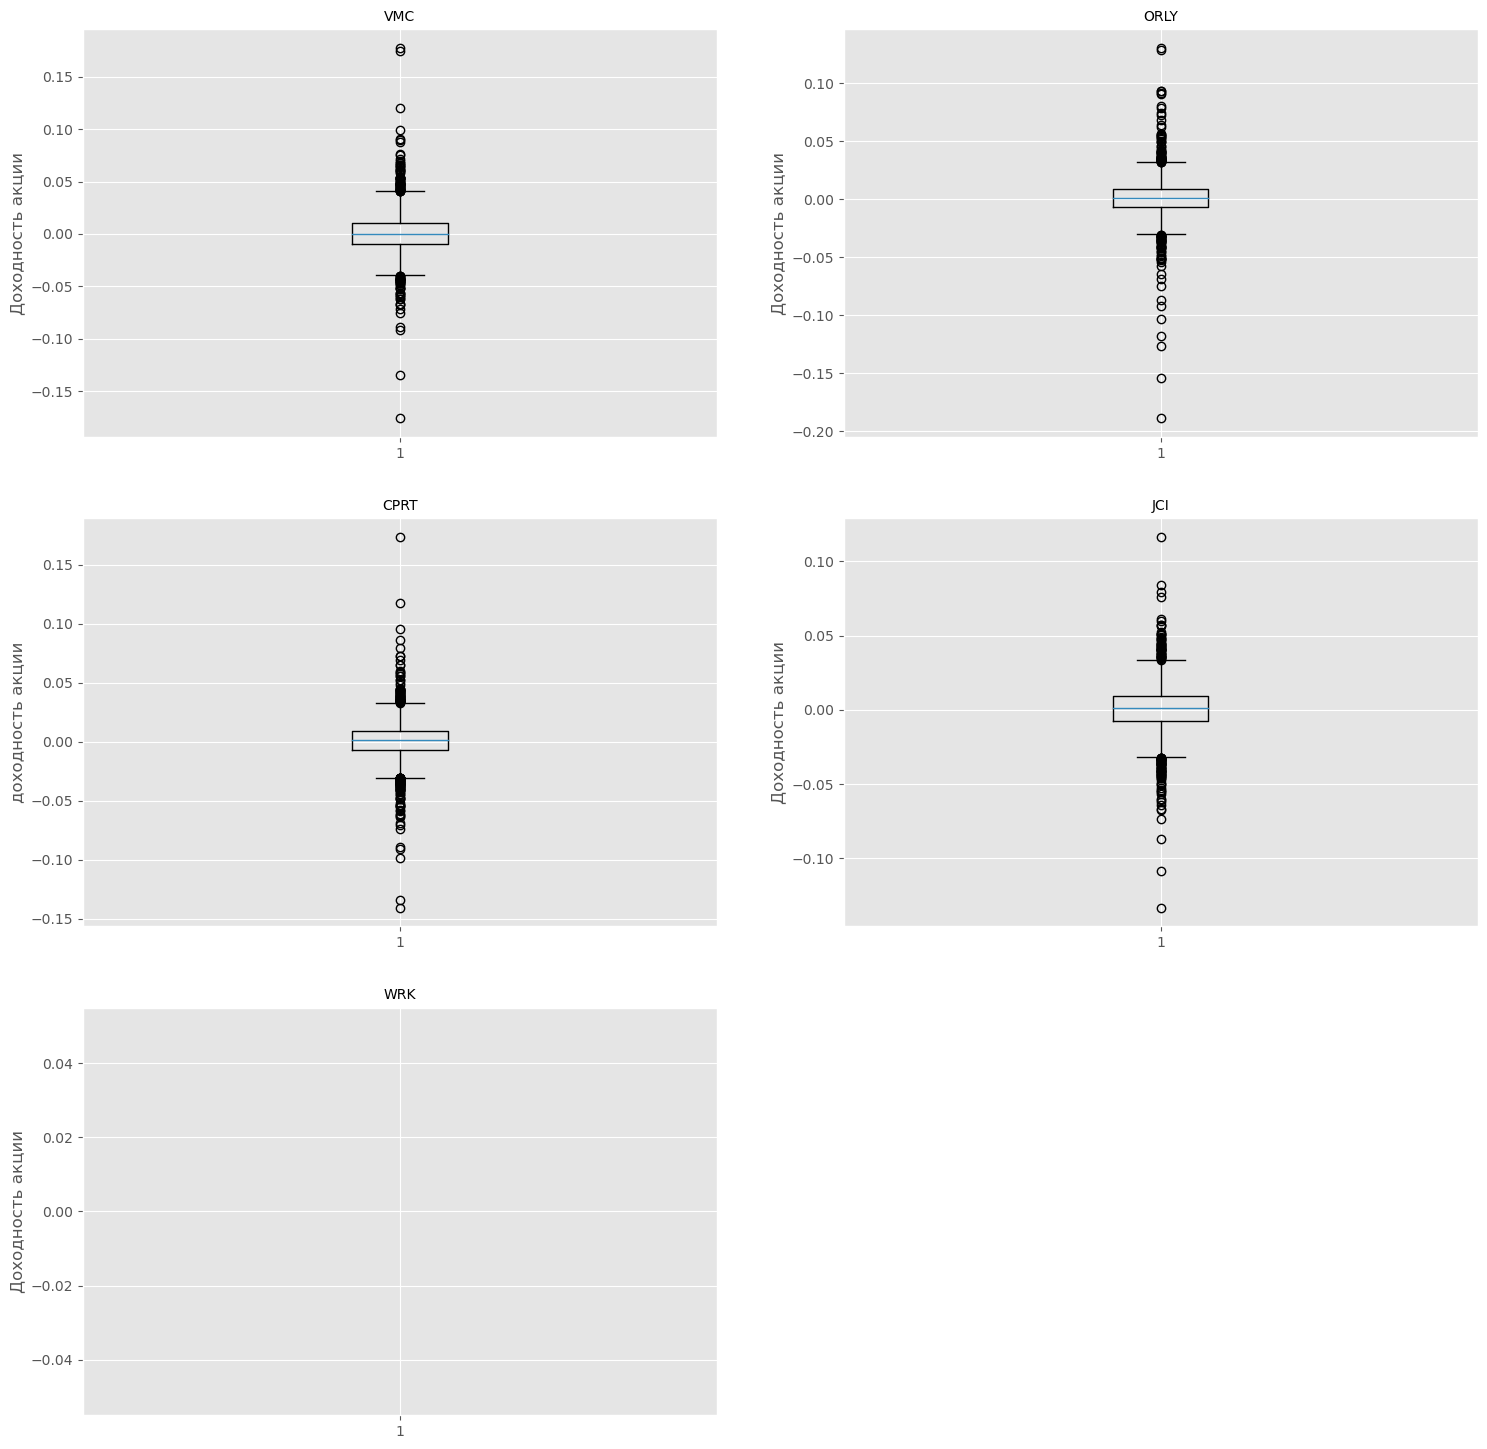

In [1120]:
plt.figure(figsize=(18, 18))

plt.subplot(3, 2, 1)
plt.title(random_tickers[0], fontsize = 10)
plt.boxplot(y_for_0)
plt.ylabel('Доходность акции')

plt.subplot(3, 2, 2)
plt.title(random_tickers[1], fontsize = 10)
plt.boxplot(y_for_1)
plt.ylabel('Доходность акции')


plt.subplot(3, 2, 3)
plt.title(random_tickers[2], fontsize = 10)
plt.boxplot(y_for_2)
plt.ylabel('доходность акции')


plt.subplot(3, 2, 4)
plt.title(random_tickers[3], fontsize = 10)
plt.boxplot(y_for_3)
plt.ylabel('Доходность акции')


plt.subplot(3, 2, 5)
plt.title(random_tickers[4], fontsize = 10)
plt.boxplot(y_for_4)
plt.ylabel('Доходность акции')


plt.show()

***По ящикам с усами доходностей ценных бумаг можно увидеть, что по доходностям действительно очень много выбросов. Выбросы на ящиках с усами отображаются как точки (круглишки), выходящие за рамки нижниге и верхнего забора.***

Чтобы посмотреть, насколько сильно распределение отличается от нормального, можно вспользоваться диаграммой квантиль-квантиль. На картинке ниже видно, что центр распределения похож на нормальное, а квантили на хвостах отличаются от нормальных в более тяжёлую сторону. 

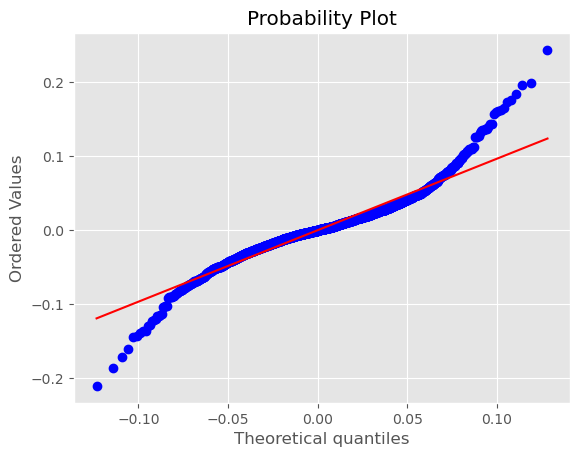

In [1121]:
ax = plt.subplot(111)
x = df_r['TSLA'].values
sts.probplot(x, dist="norm", sparams=(x.mean(), x.std()), plot=ax);

__ё) [10 баллов]__  Без буквы `ё` никуда, скажут нам [Пафнутий Чебышёв](https://ru.wikipedia.org/wiki/%D0%A7%D0%B5%D0%B1%D1%8B%D1%88%D1%91%D0%B2,_%D0%9F%D0%B0%D1%84%D0%BD%D1%83%D1%82%D0%B8%D0%B9_%D0%9B%D1%8C%D0%B2%D0%BE%D0%B2%D0%B8%D1%87) и [Лёв Толстой](https://arzamas.academy/special/ruslit/writers/tolstoy).  

Разобьём выборку на обучающую и тестовую. Первые 9 лет войдут в обучающую выборку, последний год в тестовую. Мы будем оценивать рискованность и доходность разных активов на обучающей выборке, а затем смотреть, насколько хорошо мы это сделали на тестовой.

In [1122]:
df_train = df_r[df_r.index  < '2022-03-03']
df_test = df_r[df_r.index  >= '2022-03-03']

__Все расчёты ниже делайте по обучающей выборке.__ 

Посчитайте для всех компаний на обучающей выборке среднюю доходность (просто сделайте `.mean()` за весь период). Найдите 10 самых доходных компаний и 10 самых убыточных.  Есть ли среди самых доходных компаний Тесла? :) 

In [1123]:
R = df_train.mean()
print("\n10 самых доходных\n", R.sort_values(ascending=False)[0:10], sep='')
print("\n10 самых убыточных\n", R.sort_values(ascending=False)[-1:-11:-1], sep='')


10 самых доходных
CEG     0.006477
LCID    0.004682
MRNA    0.003882
GFS     0.003782
DDOG    0.003149
CARR    0.003140
ENPH    0.002918
ZS      0.002762
TSLA    0.002746
CRWD    0.002606
dtype: float64

10 самых убыточных
RIVN   -0.005722
VTRS   -0.000168
KHC    -0.000037
GE      0.000021
IBM     0.000060
LUMN    0.000060
KMI     0.000071
SLB     0.000087
BEN     0.000105
WBD     0.000149
dtype: float64


***Да, среди самых доходных компаний есть Тесла)***

In [1124]:
STD = df_train.std()
print("\n10 самых рисковых\n", STD.sort_values(ascending=True)[0:10], sep='')
print("\n10 самых безрисковых\n", STD.sort_values(ascending = True)[-1:-11:-1], sep='')


10 самых рисковых
VZ      0.011099
JNJ     0.011255
KO      0.011309
PG      0.011339
RSG     0.011408
WM      0.011432
PEP     0.011443
CL      0.011778
MMC     0.012117
COST    0.012303
dtype: float64

10 самых безрисковых
RIVN    0.072406
LCID    0.066841
ENPH    0.052601
MRNA    0.052030
PDD     0.045639
ZM      0.042788
GFS     0.041315
SEDG    0.040310
CRWD    0.039878
DDOG    0.039034
dtype: float64


***Нет, среди самых рискованных компаний Теслы нет***

Обычно инвесторы принимают решение покупать бумагу к себе в портфель, отталкиваясь от того какие соотношения доходность/риск существуют на рынке. Создайте таблицу `df_result`. Запищите туда три колонки: тикер, доходность и стандартное отклонение.

In [1125]:
df_result = pd.DataFrame({"Symbol": STD.index,'std':STD.to_numpy(), 'r': R.to_numpy()})
df_result.head()

,Symbol,std,r
0,A,0.015556,0.000808
1,AAL,0.031476,0.000579
2,AAP,0.020050,0.000659
3,AAPL,0.017579,0.001268
4,ABBV,0.017331,0.000925


Постройте для наших ценных бумаг диаграмму рассеивания, на которой будет видно, где по своей доходности и риску находится какая ценная бумага.

Отдельно отметьте на картинке точку, соотвествующую Тесле так, чтобы её было видно. Можно ли купить какую-то другую бумагу, которая обладает примерно такой же доходностью как тесла, но при этом её риск меньше? 

__Ответ:__ Так как на графике я откладывал по оси y доходность компаний, а по оси y - их рискованность, то, чтобы найти компанию, которая будет являться более доходной и в то же время менее рискованной, чем тесла, нам надо взять компанию, которая будет на том же уровне или **выше**, чем Тесла, при этом будет находиться на том же уровне или **левее**, чем тесла. То есть нам надо искать точку, которая будет сверху слева от теслы. И по графику видно, что такая точка есть, и она одна 

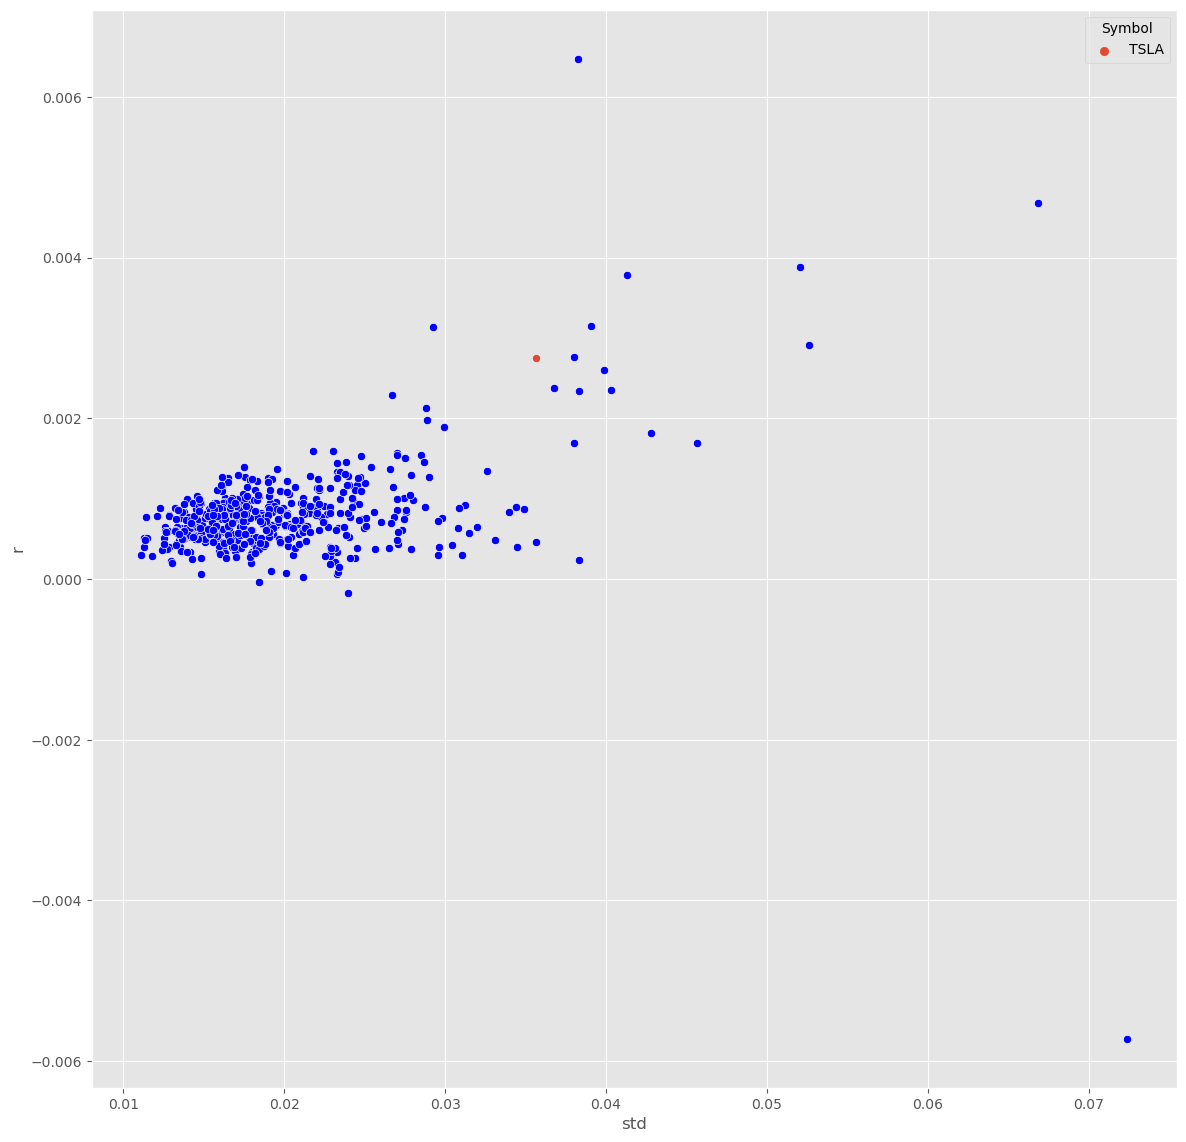

In [1126]:
plt.figure(figsize=(14,14))
sns.scatterplot(data = df_result, x = "std", y = "r", color='blue')
sns.scatterplot(data = df_result[df_result.Symbol == 'TSLA' ], x = "std", y = "r", hue='Symbol')
plt.show() 

Чем больше риск, тем выше потенциально может оказаться доходноcть. __Но при этом мы с более высокой вероятностью можем уйти в убыток.__ 

__ж) [5 баллов]__  Надо понимать, что стандартное отклонение чувствительно к выбросам. Поэтому в качестве меры риска часто рассматривают $\text{VaR}$. 

__Value-at-Risk__ — одна из самых распространенных форм измерения финансовых рисков. Общепринято обозначается $\text{VaR}$. Еще его часто называют статистика $16:15$, такое название он получил потому, что $16:15$ – это время, в которое он якобы должен лежать на столе главы правления банка JPMorgan. (В этом банке данный показатель был впервые введен с целью повышения эффективности работы с рисками).

__Value-at-Risk__ на каком-либо уровне (скажем, $5\%$) – это просто квантиль уровня $5\%$. То есть это такая доходность, что в $95\%$ случаев у нас дела будут лучше.

Посчитайте $5\%$ $\text{VaR}$ по всем ценным бумагам. Для этого используйте метод `quantile()`. Найдите 10 самых рискованных компаний и 10 наименее рискованных компаний с точки зрения этого показателя. Запишите `VaR` в табличку `df_result` отдельной колонкой (нужно сделать `join`). Домножьте значения VaR на -1, чтобы интерпретировать числа как потери.  

In [1127]:
df_result.head() #просто смотрю, что у меня сейчас есть

,Symbol,std,r
0,A,0.015556,0.000808
1,AAL,0.031476,0.000579
2,AAP,0.020050,0.000659
3,AAPL,0.017579,0.001268
4,ABBV,0.017331,0.000925


In [1128]:
# your code here
# ｀、ヽ｀ヽ｀、ヽ(ノ＞＜)ノ ｀、ヽ｀☂ヽ｀、ヽ

var = df_train.quantile(0.05)*(-1) #нахожу квантиль
VaR = pd.DataFrame({'Symbol':df_train.columns, 'VaR':var}) #делаю из найденных квантилей таблицу
VaR

,Symbol,VaR
A,A,0.025164
AAL,AAL,0.044087
AAP,AAP,0.026499
AAPL,AAPL,0.025629
ABBV,ABBV,0.024926
...,...,...
ZBRA,ZBRA,0.030612
ZION,ZION,0.030714
ZM,ZM,0.061953
ZS,ZS,0.055926


In [1129]:
# добавим получившиеся значения в нашу таблицу
VaR.name = 'VaR'
df_result = pd.merge(df_result, VaR, left_on='Symbol', right_on='Symbol') #добавляю в df_result свои квантили
df_result

,Symbol,std,r,VaR
0,A,0.015556,0.000808,0.025164
1,AAL,0.031476,0.000579,0.044087
2,AAP,0.020050,0.000659,0.026499
3,AAPL,0.017579,0.001268,0.025629
4,ABBV,0.017331,0.000925,0.024926
...,...,...,...,...
515,ZBRA,0.023282,0.001256,0.030612
516,ZION,0.020683,0.000733,0.030714
517,ZM,0.042788,0.001823,0.061953
518,ZS,0.037999,0.002762,0.055926


Постройте для наших ценных бумаг диаграмму рассеивания, на которой будет видно, где по своей доходности и риску находится какая ценная бумага. Отдельно отметьте теслу. В качестве меры риска используйте $\text{VaR}.$

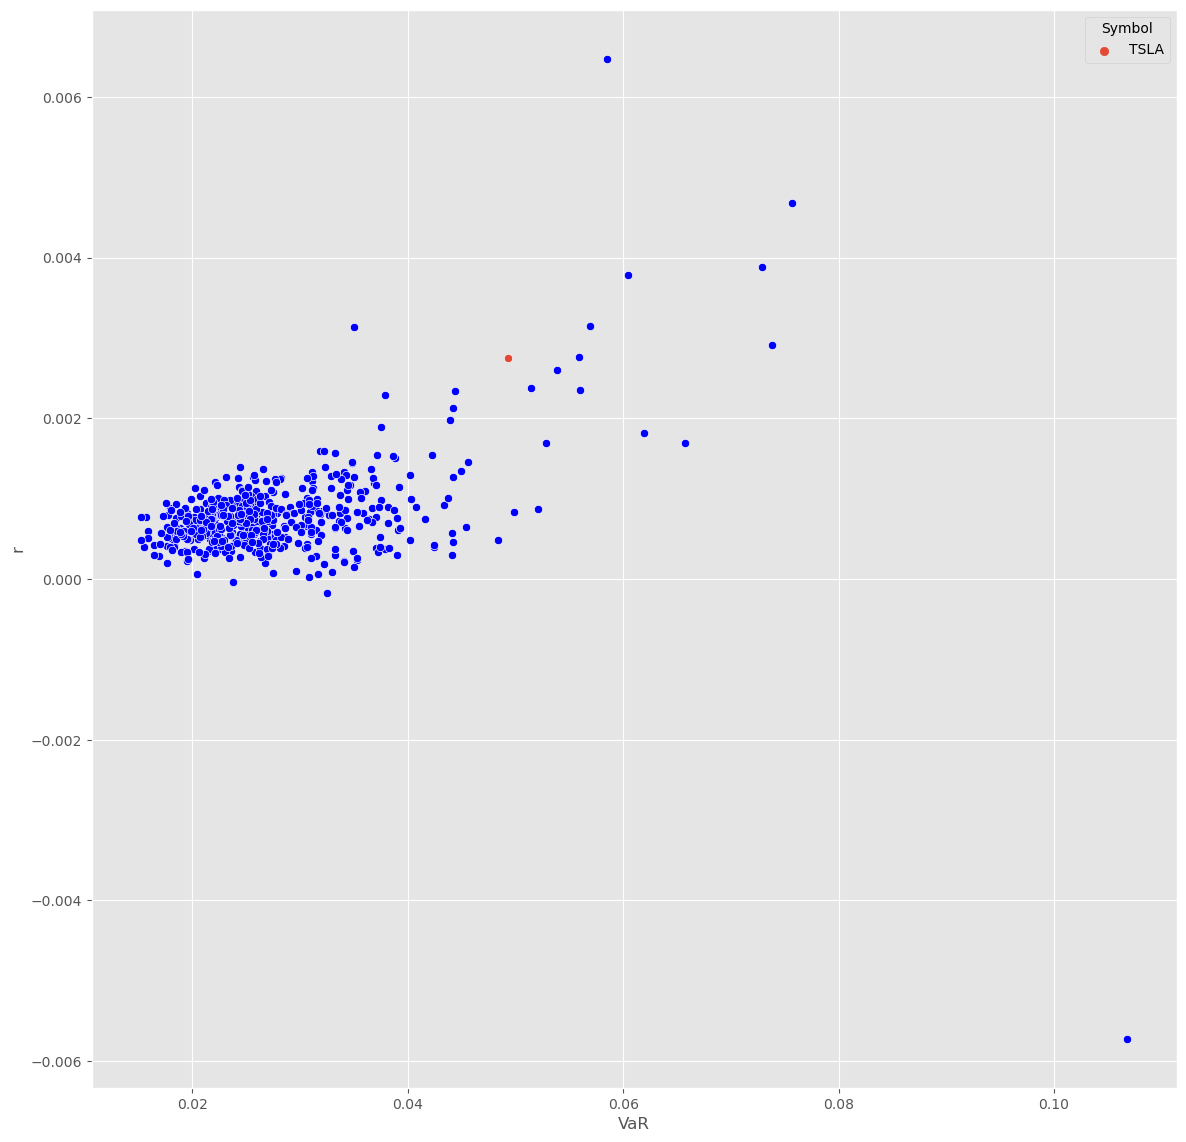

In [1130]:
plt.figure(figsize=(14,14))
sns.scatterplot(data = df_result, x = "VaR", y = "r", color='blue') 
sns.scatterplot(data = df_result[df_result.Symbol == 'TSLA'], x = "VaR", y = "r", hue = 'Symbol') 
plt.show() 

$\text{VaR}$ хорош тем, что описывает именно ту часть распределения, которую мы боимся. Но $\text{VaR}$ - это лучшее из $5\%$ худших случаев. А что лежит в тех $5\%$ худших случаев?…

__Expected shortfall__ - это среднее значение по всем тем точкам, что оказались хуже $\text{VaR}$, То есть среднее по худшим $5\%$. Эта метрика показывает что в среднем произойдёт с нашей доходностью в этих самых плохих $5\%$ случаев. 

- Рассчитаете $\text{ES}$ для Теслы
- Предположим, что мы вложили в Теслу $1000$ долларов в один из самых неудачных дней. Сколько в среднем денег мы потеряем от этой $1000$ долларов к концу дня? 
- Посчитайте, сколько денег мы заработаем в $5\%$ лучших случаев к концу дня? 

__Важно:__ $\text{VaR}$ и $\text{ES}$ в этом пункте - отрицательные числа.

In [1131]:
ES_t = df_train['TSLA'][df_train['TSLA']<= (VaR[VaR['Symbol']=='TSLA']*(-1)).values[0][1]].mean() #считаю ES для теслы
WIN_t = df_train['TSLA'][df_train['TSLA'] >= (VaR[VaR['Symbol']=='TSLA']).values[0][1]].mean() # тут я считаю то же самое, что ES
# но для 5% лучших случаев. Делая расчеты я исхожу из того, что, так как распределение нормальное, а значит симметричное, значит по модулю квантиль 5%
# лучших и 5% худших - одно и то же число

In [1132]:
print(f'ES для Теслы равняется {ES_t}')
print(f'Если мы вложим в Теслу 1000 долларов в один из самых неудачных дней, то в среднем за день мы потеряем {1000*ES_t*(-1)} долларов')
print(f'Если мы вложим в Теслу 1000 долларов в один из самых удачных дней, то в среднем за день мы заработаем {1000*WIN_t} долларов')

ES для Теслы равняется -0.07554044469806388
Если мы вложим в Теслу 1000 долларов в один из самых неудачных дней, то в среднем за день мы потеряем 75.54044469806388 долларов
Если мы вложим в Теслу 1000 долларов в один из самых удачных дней, то в среднем за день мы заработаем 86.47996811939258 долларов


Посчитайте $\text{ES}$ по всем ценным бумагам. Домножьте получившееся значение на (-1). Запишите его отдельным столбцом в `df_result` (нужно сделать `join`)

In [1133]:
ES = pd.DataFrame(df_train[df_train <= VaR.T.loc['VaR']*(-1)].mean())
ES #нахожу ES по всем ценным бумагам

,0
A,-0.036676
AAL,-0.067565
AAP,-0.043459
AAPL,-0.039872
ABBV,-0.040371
...,...
ZBRA,-0.052334
ZION,-0.046021
ZM,-0.088902
ZS,-0.082118


In [1134]:
ES.index.name = 'symbol' #присваиваю наименование индексу
ES.name = 'ES' #присваиваю имя табюлице
ES.rename(columns = {0:'ES'}, inplace = True) #назваю столбец с ES
ES= ES*(-1) #домножаю ES на (-1) - по условию

In [1135]:
ES #смотрю, что получилось

,ES
symbol,
A,0.036676
AAL,0.067565
AAP,0.043459
AAPL,0.039872
ABBV,0.040371
...,...
ZBRA,0.052334
ZION,0.046021
ZM,0.088902


In [1136]:
VaR

,Symbol,VaR
A,A,0.025164
AAL,AAL,0.044087
AAP,AAP,0.026499
AAPL,AAPL,0.025629
ABBV,ABBV,0.024926
...,...,...
ZBRA,ZBRA,0.030612
ZION,ZION,0.030714
ZM,ZM,0.061953
ZS,ZS,0.055926


In [1137]:
df_result = pd.merge(df_result, ES, left_on='Symbol', right_on='symbol', how='left') #мерджу все в одну таблицу df_result

In [1138]:
df_result.round(3)
df_result.rename(columns = {'Symbol':'Ticker'}, inplace = True)
df_result.sort_values(by='ES', inplace=True)
df_result #переименовываю колонки, чтобы контест их принял, смотрю, что получилось

,Ticker,std,r,VaR,ES
489,VZ,0.011099,0.000295,0.016457,0.024731
373,PEP,0.011443,0.000513,0.015868,0.025298
376,PG,0.011339,0.000487,0.015249,0.026102
500,WM,0.011432,0.000776,0.015233,0.026202
413,RSG,0.011408,0.000767,0.015696,0.026484
...,...,...,...,...,...
370,PDD,0.045639,0.001691,0.065768,0.092025
322,MRNA,0.052030,0.003882,0.072876,0.103912
162,ENPH,0.052601,0.002918,0.073849,0.105275
275,LCID,0.066841,0.004682,0.075715,0.124900


In [1139]:
 df_result.to_csv('var_result.csv', index=False) #загружаю таблицу

1. Округлите данные до 3-х знаков после запятой `df_result.round(3)`
2. Отсортируйте таблицу `df_result` по колонке `ES` по убыванию
3. Запишите получившиеся результаты в таблицу с колонками `'Ticker', 'std', 'r', 'VaR', 'ES'` в файл `var_result` Таблица должна быть без индексов. Последняя строка не должна быть пустой. Колонки друг от друга отделяются запятыми. Порядок колонок должен быть именно таким.
4. Отправьте свой файл `var_result.csv` в контест (https://contest.yandex.ru/contest/47242/problems/A) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.

__Никнейм__: rasokurov@edu.hse.ru

__Ссылка__: https://contest.yandex.ru/contest/47242/run-report/84925718/

__Анекдот__

***Внимание!*** 

*Анекдот нецензурный. Переходя по данной ссылке вы подтверждаете свое личное желание прочитать анекдот и отказываетесь от любого рода претензий. Анекдот не несет цели кого-то обидеть, оскорбить, не передает личного отноения и не несет скрытого подтекста*

https://pastebin.com/Br2SYm8K

> __Дисклеймер:__ Успешная посылка в контесте является обязательным условием получения полного балла за этот (и следующий) пункт. Если добиться успешной посылки не удастся, баллы будут выставляться на усмотрение проверяюшего.

> При этом ОК в контесте не гарантирует полный балл. Оценка всё равно может быть снижена в случае обнаружения неэффективностей или ошибок в коде. Если вы сдадите в AnyTask очевидно неработающий код или ноутбук без кода, но при этом в контест будет сдан корректный файл, то это будет расцениваться как плагиат. На всякий случай просим вас сдать вместе с ноутбуком файл res_fall.csv в anytask.

__Какая метрика лучше?__

Никакая. Все рассуждения о риске – это попытки уложить функцию распределения доходностей в одно единственное число. Поэтому информация потеряется и все метрики будут не идеальны. А к чему это приведет, можно прочитать в книге Скотта Паттерсона ["Кванты. Как волшебники от математики заработали миллиарды и чуть не обрушили фондовый рынок."](https://disk.yandex.ru/i/ryFfPZ8_1uTO6g) Тем не менее, какие-то цифры, на которые можно было бы ориентироваться при принятии решений необходимы.

## 1.3 VaR-кривая 

__з) [10 баллов]__ Мы что-то насчитали. А это вообще работает? Давайте проверим на тестовой выборке для Теслы.

In [1140]:
var_tsla = df_train['TSLA'].quantile(0.05)
df_tsla = df_test['TSLA'].reset_index()
df_tsla['is_bad'] = (df_test['TSLA'].values < var_tsla)
df_tsla['is_bad'].mean()

0.14285714285714285

In [1141]:
df_tsla

,Date,TSLA,is_bad
0,2022-03-03,-0.046142,False
1,2022-03-04,-0.001192,False
2,2022-03-07,-0.040213,False
3,2022-03-08,0.024634,False
4,2022-03-09,0.041934,False
...,...,...,...
247,2023-02-27,0.054602,False
248,2023-02-28,-0.009247,False
249,2023-03-01,-0.014292,False
250,2023-03-02,-0.058539,True


На тестовой выборке мы пробили для Теслы VaR в 14% случаев вместо 5%. Это очень плохой результат. Наша оценка риска оказалась провальной. Можно с помощью теста Купика проверить значимость этих отличий, но мы пока что не будем это делать. Отложим эту историю до домашки про гипотезы.

Нарисуем VaR-кривую.

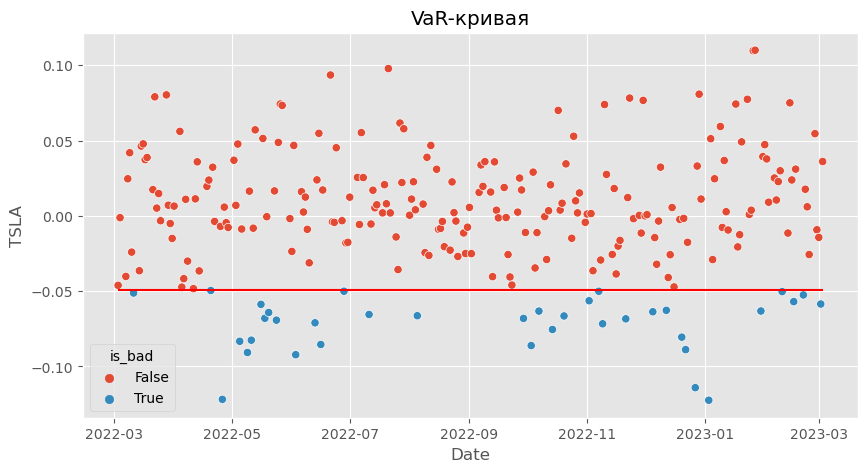

In [1142]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_tsla, x='Date',y='TSLA', hue='is_bad')
plt.hlines(var_tsla, df_tsla.Date.min(), df_tsla.Date.max(), color='red')
plt.title('VaR-кривая');

А почему все это плохо? А потому, что мы не расширяем обучающую выборку, то есть не учитываем новую информацию. Мы один раз предсказали $\text{VaR}$ и так с ним и сидим. Давайте сделаем по-другому.

- Выделите $N$ точек (первые 4 года), найдите по ним $\text{VaR}$ для $N+1$ дня. Потом сдвинем $N$ точек вправо и найдём $\text{VaR}$ по ним для точки $N + 2$. И так далее. Тогда $\text{VaR}$ будет в каждой точке разный. 
- Нарисуйте получившуюся для Теслы кривую на картинке.
- Посчитайте как часто мы пробивали $\text{VaR}$ на практике, улучшилась ли цифра?

In [1143]:
df_test

,A,AAL,AAP,AAPL,ABBV,ABC,ABNB,ABT,ACGL,ACN,...,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZS,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-03,0.030114,-0.040318,-0.003826,-0.001981,0.005616,0.017273,-0.037072,0.005068,-0.011884,0.001948,...,0.006333,0.015625,0.008964,-0.018852,-0.004564,-0.019216,-0.005557,-0.069896,-0.048662,-0.001020
2022-03-04,-0.023912,-0.071292,-0.007922,-0.018408,0.000997,0.012580,-0.059266,0.003637,-0.011598,-0.015018,...,0.037636,-0.013696,-0.041273,-0.008104,-0.013838,-0.032041,-0.038382,-0.036867,-0.068297,0.004952
2022-03-07,-0.026514,-0.119945,-0.025699,-0.023718,-0.007372,-0.016701,-0.077856,-0.021003,-0.038027,-0.029094,...,0.036033,-0.020354,-0.021935,-0.045734,-0.031219,-0.031935,-0.048325,-0.009730,-0.093703,-0.044452
2022-03-08,-0.007826,0.052181,-0.003626,-0.011676,-0.015390,-0.002969,0.080097,-0.023136,-0.004518,-0.011147,...,0.007576,-0.020582,-0.012113,0.017123,-0.007970,0.005948,0.003535,0.005654,-0.028086,-0.035621
2022-03-09,0.030467,0.058475,0.021438,0.034997,0.011485,0.009833,0.043481,0.019636,0.033810,0.025860,...,-0.056847,0.017248,0.039092,0.006768,0.016328,0.039565,0.042914,0.005438,0.069073,0.045151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-27,0.006940,0.004499,0.012820,0.008248,0.010281,-0.012234,0.006108,-0.006868,0.000578,-0.001051,...,-0.001806,0.006408,0.001465,-0.002050,0.004890,0.014764,0.002387,-0.002841,0.007335,-0.005170
2023-02-28,-0.001477,0.022393,0.030790,-0.003448,-0.002463,-0.006831,-0.002024,0.019545,0.011415,-0.002629,...,-0.005789,0.101881,0.000975,0.004661,0.004623,0.013570,0.004564,0.011801,-0.005234,0.009246
2023-03-01,-0.031415,0.003129,-0.042357,-0.014246,0.008902,0.006107,-0.019873,-0.008750,0.013857,-0.007381,...,0.008916,-0.018650,-0.015197,-0.007550,-0.014451,0.006961,-0.003556,-0.066631,-0.020663,0.003413


In [1144]:
historical_var_science_2022_03_02 = [] #cюда мы будем сохранять наш исторический VaR
needed_dates=df_r.TSLA.index #это просто список всех доступных нам дат
interval_for_dates = df_r.TSLA.loc['2013-03-06':'2022-03-02'].shape[0] #тут мы находим, какое количество дней мы берем для
# расчета первого VaR
number_of_points = df_r.TSLA.loc['2022-03-02':].shape[0] #здесь я оцениваю, какое количество точек вообще надо посчитать, чтобы
# вовремя остановить цикл
counter = 0
for k in range(len(needed_dates)):
    historical_var_science_2022_03_02.append(df_r.TSLA.loc[needed_dates[k]:needed_dates[k+interval_for_dates-1]].quantile(0.05))
    counter += 1
    if counter == number_of_points:
        break
historical_var_science_2022_03_02[:10]

[-0.049286108471130435,
 -0.049286108471130435,
 -0.049286108471130435,
 -0.049286108471130435,
 -0.049286108471130435,
 -0.049286108471130435,
 -0.049286108471130435,
 -0.049286108471130435,
 -0.049286108471130435,
 -0.049286108471130435]

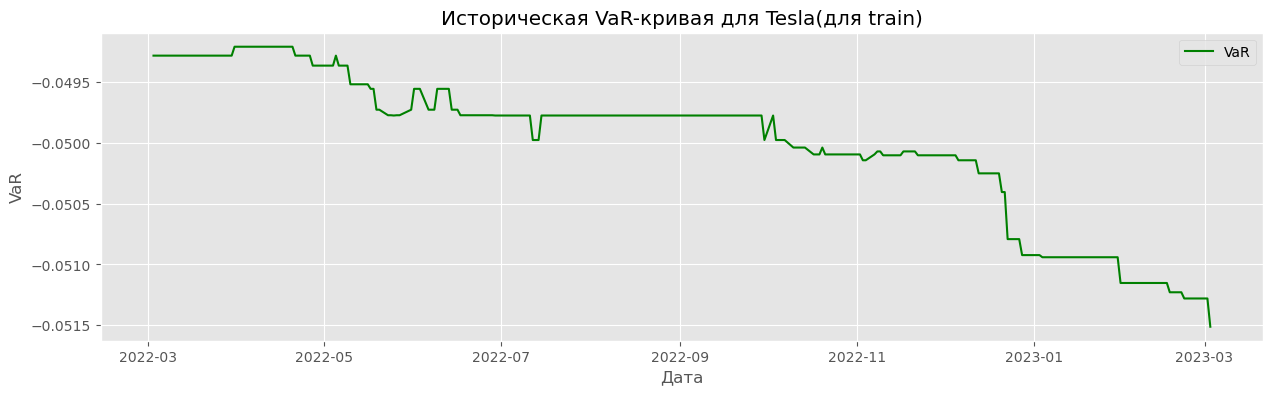

In [1145]:
plt.figure(figsize=(15,4))
plt.title('Историческая VaR-кривая для Tesla(для train)')
plt.xlabel('Дата')
plt.ylabel('VaR')
plt.plot(df_r.TSLA.loc['2022-03-03':].index, historical_var_science_2022_03_02[:-1], color = 'green', label = 'VaR')
plt.legend();

***Теперь проверим, как работает наш VaR на практике***

In [1146]:
df_hist_VaR = pd.DataFrame({'Date':df_r.loc['2022-03-03':].index, 'VaR':historical_var_science_2022_03_02[:-1]})
df_hist_VaR.set_index('Date', inplace=True)
df_hist_VaR

,VaR
Date,
2022-03-03,-0.049286
2022-03-04,-0.049286
2022-03-07,-0.049286
2022-03-08,-0.049286
2022-03-09,-0.049286
...,...
2023-02-27,-0.051279
2023-02-28,-0.051279
2023-03-01,-0.051279


In [1147]:
df_test.TSLA

Date
2022-03-03   -0.046142
2022-03-04   -0.001192
2022-03-07   -0.040213
2022-03-08    0.024634
2022-03-09    0.041934
                ...   
2023-02-27    0.054602
2023-02-28   -0.009247
2023-03-01   -0.014292
2023-03-02   -0.058539
2023-03-03    0.036092
Name: TSLA, Length: 252, dtype: float64

In [1148]:
(df_test.TSLA.loc['2022-03-02':] < df_hist_VaR.loc['2022-03-02':].VaR).mean()

0.1349206349206349

***Видно, что теперь события идут хуже, чем наш VaR в 13,5% случаев (процент пробитий), что значительно лучше, чем когда VaR был постоянным, однако все еще очень далеко от 5%, необходимых для VaR***

In [1149]:
df_tsla = df_test['TSLA'].reset_index()
df_test.TSLA.loc['2022-03-02':] < df_hist_VaR.loc['2022-03-02':].VaR
df_tsla=  pd.merge(df_tsla, pd.DataFrame(df_test.TSLA.loc['2022-03-02':] < df_hist_VaR.loc['2022-03-02':].VaR), left_on='Date', right_on='Date', how='left') #мерджу
df_tsla.rename(columns={0: 'is_bad'}, inplace=True)
#Источник: https://tonais.ru/library/pereimenovanie-stolbtsov-dataframe?ysclid=lfzbum4hrh980377674
df_tsla

,Date,TSLA,is_bad
0,2022-03-03,-0.046142,False
1,2022-03-04,-0.001192,False
2,2022-03-07,-0.040213,False
3,2022-03-08,0.024634,False
4,2022-03-09,0.041934,False
...,...,...,...
247,2023-02-27,0.054602,False
248,2023-02-28,-0.009247,False
249,2023-03-01,-0.014292,False
250,2023-03-02,-0.058539,True


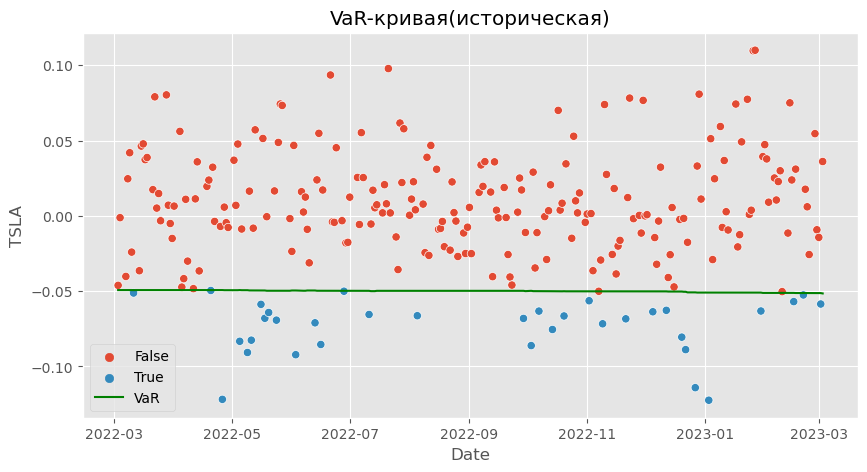

In [1150]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_tsla, x='Date',y='TSLA', hue='is_bad')
plt.plot(df_test.TSLA.index, df_hist_VaR.loc['2022-03-02':].VaR, color = 'green', label = 'VaR')
plt.title('VaR-кривая(историческая)')
plt.legend();

***Построив график новой VaR-кривой, видно, что почти никакие точки, которые не покрывались VaR, теперь ею покрываются, так как сама VaR из-за того что выбранный промежуток в 9 лет слишком большой, чтобы внести значимые изменения. Тем не менее, видно, что VaR идет слегка ниже и потенциально справляется со своей задачей чуть лучше, чем постоянная VaR***

Способ оценки $\text{VaR},$ который мы использовали, называется **историческим.** Кроме него есть довольно много других способов. Например:

- можно попробовать подогнать какое-то распределение под данные и взять его квантиль
- можно попробовать обучить модель машинного обучения предсказывать соотвествующий квантиль
- можно обучить какую-нибудь модель на временном ряде
- можно попробовать отдельно моделировать хвосты распределения

Часть способов более подробно можно [посмотреть в лекциях Ильи Езепова.](https://rpubs.com/iezepov) Они немного староваты, но хороши. 

__и) [бонусные 5 баллов]__

Разберитесь как работает какой-нибудь ещё метод оценки $\text{VaR}$ и реализуйте его. Сравните его работу с историческим методом на нескольких ценных бумагах из наших данных. Например, вы можете разобраться с [ОГРом](https://rpubs.com/iezepov/e502lec2) или [моделированием хвостов.](https://rpubs.com/iezepov/e502lec6) Весь код должен быть написан на питоне. Часть бонуса -- попытаться найти библиотеки для этого.

***Тут я бы хотел не реализовать новый метод оценки, а скорее доработать исторический, так как из-за большого врменного лага эффективность нашего VaR практически не поменялась с того момента, как мы сделали его историческим. Чтобы усовершенствовать подсчет VaR предлагаю уменьшит временной лаг с 9 лет до 1 года.***

In [1151]:
historical_var_science_2014_03_06 = [] #cюда мы будем сохранять наш исторический VaR
needed_dates=df_r.TSLA.index #это просто список всех доступных нам дат
interval_for_dates = df_r.TSLA.loc['2013-03-06':'2014-03-06'].shape[0] #тут мы находим, какое количество дней мы берем для
# расчета первого VaR
number_of_points = df_r.TSLA.loc['2014-03-06':].shape[0] #здесь я оцениваю, какое количество точек вообще надо посчитать, чтобы
# вовремя остановить цикл
counter = 0
for k in range(len(needed_dates)):
    historical_var_science_2014_03_06.append(df_r.TSLA.loc[needed_dates[k]:needed_dates[k+interval_for_dates-1]].quantile(0.05))
    counter += 1
    if counter == number_of_points:
        break
historical_var_science_2014_03_06[:10]

[-0.05231552931067172,
 -0.05231552931067172,
 -0.05231552931067172,
 -0.05231552931067172,
 -0.05231552931067172,
 -0.05231552931067172,
 -0.05231552931067172,
 -0.051772369703599073,
 -0.051772369703599073,
 -0.051772369703599073]

In [1152]:
df_hist_VaR = pd.DataFrame({'Date':df_r.loc['2014-03-06':].index, 'VaR':historical_var_science_2014_03_06})
df_hist_VaR.set_index('Date', inplace=True)
df_hist_VaR

,VaR
Date,
2014-03-06,-0.052316
2014-03-07,-0.052316
2014-03-10,-0.052316
2014-03-11,-0.052316
2014-03-12,-0.052316
...,...
2023-02-27,-0.071280
2023-02-28,-0.071280
2023-03-01,-0.071280


In [1153]:
(df_test.TSLA.loc['2022-03-03':] < df_hist_VaR.loc['2022-03-03':].VaR).mean()

0.07936507936507936

***Вот, теперь результаты значительно лучше, процент пробивания составляет 8% и почти соответсвуют эталонным 5%.***

In [1154]:
df_tsla = df_test['TSLA'].reset_index()
df_tsla=  pd.merge(df_tsla, pd.DataFrame(df_test.TSLA.loc['2022-03-03':] < df_hist_VaR.loc['2022-03-03':].VaR), left_on='Date', right_on='Date', how='left') #мерджу
df_tsla.rename(columns={0: 'is_bad'}, inplace=True)
#Источник: https://tonais.ru/library/pereimenovanie-stolbtsov-dataframe?ysclid=lfzbum4hrh980377674
df_tsla

,Date,TSLA,is_bad
0,2022-03-03,-0.046142,False
1,2022-03-04,-0.001192,False
2,2022-03-07,-0.040213,False
3,2022-03-08,0.024634,False
4,2022-03-09,0.041934,False
...,...,...,...
247,2023-02-27,0.054602,False
248,2023-02-28,-0.009247,False
249,2023-03-01,-0.014292,False
250,2023-03-02,-0.058539,False


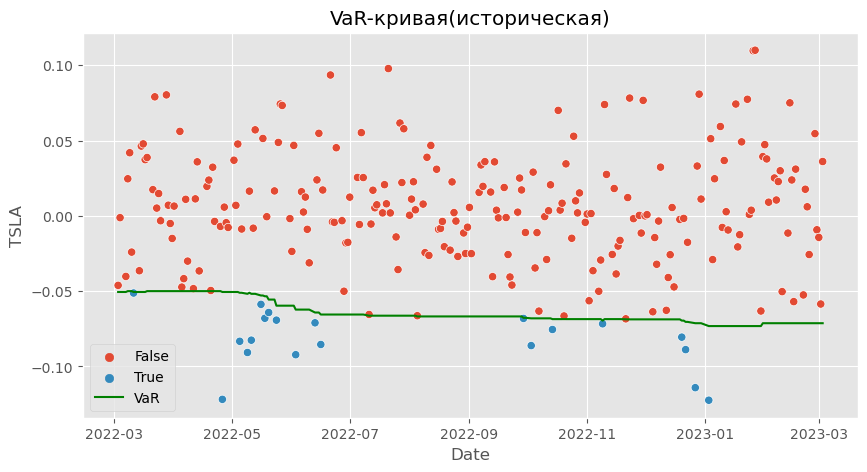

In [1155]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_tsla, x='Date',y='TSLA', hue='is_bad')
plt.plot(df_test.TSLA.index, df_hist_VaR.loc['2022-03-03':].VaR, color = 'green', label = 'VaR')
plt.title('VaR-кривая(историческая)')
plt.legend();

***Видно, что кривая VaR значительно лучше адаптируется под расширяюшуюся выборку и как бы обтекает значения, чтобы они не выходили за ее пределы. Также кривая теперь значительно более "кривая".***

# Часть 2: чековая

За задание можно получить $50$ баллов. Мы будем работать с покупками и чеками. Смотреть за корреляциями в покупках довольно полезно.

> В 1992 году группа по консалтингу в области ритейла компании Teradata под руководством Томаса Блишока провела исследование 1.2 миллиона транзакций в 25 магазинах для ритейлера Osco Drug (Drug Store — формат разнокалиберных магазинов у дома). После анализа всех этих транзакций самым сильным правилом получилось «Между 17:00 и 19:00 чаще всего пиво и подгузники покупают вместе». 

>К сожалению, такое правило показалось руководству Osco Drug настолько контринтуитивным, что ставить подгузники на полках рядом с пивом они не стали. Хотя объяснение паре пиво-подгузники вполне себе нашлось: когда оба члена молодой семьи возвращались с работы домой (как раз часам к 5 вечера), жены обычно отправляли мужей за подгузниками в ближайший магазин. И мужья, не долго думая, совмещали приятное с полезным — покупали подгузники по заданию жены и пиво для собственного вечернего времяпрепровождения.

Для работы будем использовать датасет о продуктовых корзинах: https://www.kaggle.com/heeraldedhia/groceries-dataset

- `id` - номер покупки (чека)
- `fielddate` - дата покупки
- `product` - что было куплено

In [1156]:
df = pd.read_csv('https://raw.githubusercontent.com/hse-econ-data-science/andan_2023/main/hw/data/groceries.csv', sep=',')
df.columns = ['id', 'fielddate', 'product']
print(df.shape)
df.head()

(38765, 3)


,id,fielddate,product
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


## 2.1 Разогреваемся

__а) [10 баллов]__ Сколько всего уникальных заказов было сделано?

In [1157]:
df['id'].nunique()  

3898

***Всего было сделано 3898 уникальных заказов***

Какие товары покупались чаще всего? Найдите топ-10 самых популярных товаров и изобразите частоту их покупок на столбиковой диаграмме. 

In [1158]:
print('Чаще всего покупались следующие продукты:\n', df['product'].value_counts()[:10], sep='')

Чаще всего покупались следующие продукты:
whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: product, dtype: int64


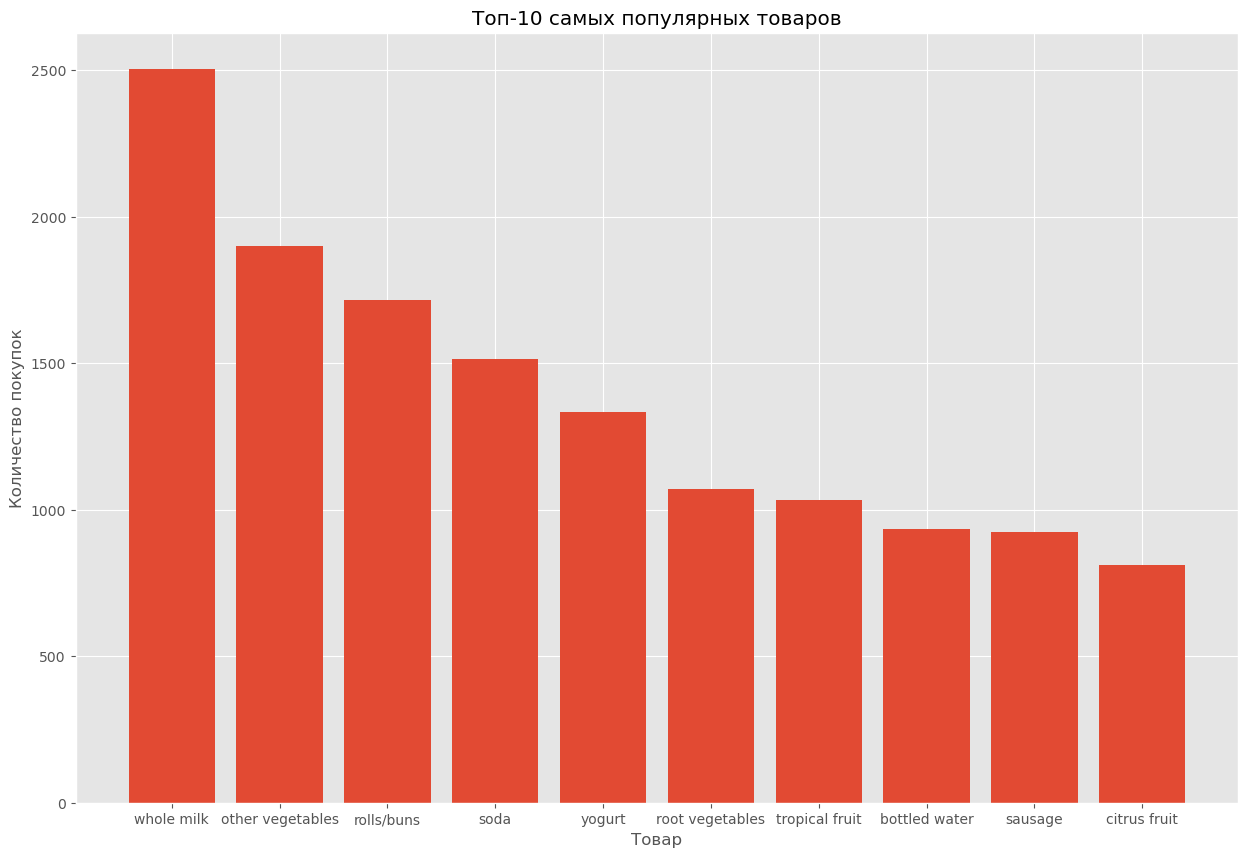

In [1159]:
plt.figure(figsize=(15,10))
plt.bar(df['product'].value_counts()[:10].index, df['product'].value_counts()[:10].values)
plt.title('Топ-10 самых популярных товаров')
plt.xlabel('Товар')
plt.ylabel('Количество покупок');

Визуализируйте как часто покупались товары с помощью [облака слов.](https://www.python-graph-gallery.com/wordcloud/) Для графика используйте все товары из датасета. 

In [1160]:
' '.join(list(df['product'].values))[:200] #делаю строку, которую потом можно будет выгрузить в wordcloud из всех продуктов в таблице

'tropical fruit whole milk pip fruit other vegetables whole milk rolls/buns other vegetables pot plants whole milk tropical fruit citrus fruit beef frankfurter chicken butter fruit/vegetable juice pack'

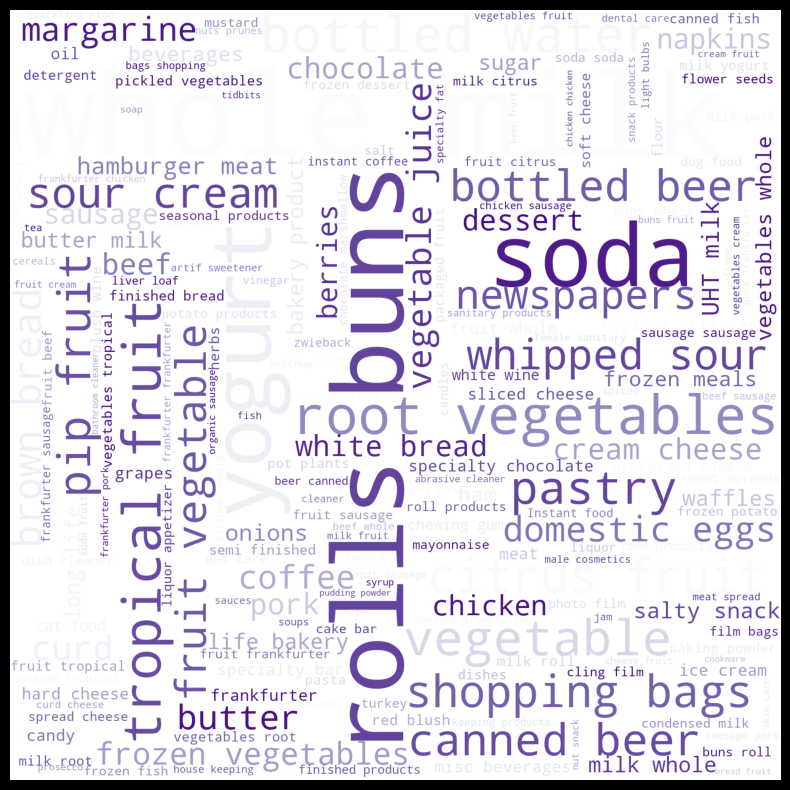

In [1161]:
# Libraries
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of word
text=(' '.join(list(df['product'].values)))

# Create the wordcloud object
wordcloud = WordCloud(background_color = 'white', colormap = 'Purples', width=1500, height=1500, margin=0).generate(text)

# Display the generated image:
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')
#Источник1: https://pyquestions.com/increase-resolution-with-word-cloud-and-remove-empty-border
#Источник2: https://www.python-graph-gallery.com/wordcloud/

__б) [10 баллов]__ Начнём анализировать совместные покупки товаров.

В таблице выше в каждой строке записана информация о покупке конкретного товара. Давайте сделаем табличку размера "число товаров" на "число покупок", чтобы понимать какие товары покупались вместе, а какие нет. 

По строкам отложите номера чеков. По столбцам отложите название продуктов. На пересечении должно стоять число товаров, купленное в этом чеке. Используйте для этого команду `pivot_table`.

In [1162]:
df_pivot = pd.pivot_table(df, index = 'id', columns = 'product', values='product', aggfunc = 'count', fill_value=0)
df_pivot

product,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
id,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,2,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


В нашей матрице огромное число нулей. Обычно такие матрицы называют разряжеными. Мы занимаем нулями кучу свободной памяти, которую мы могли бы не занимать, если бы хранили данные [в виде разреженных матриц.](https://cmdlinetips.com/2018/03/sparse-matrices-in-python-with-scipy/) У нас данные небольшие, поэтому мы забьём на неоптимальность и продолжим работать с ними в `pandas`.

Постройте матрицу корреляций Пирсона. Визуализируйте матрицу с помошью heatmap.

In [1163]:
df_corr = df_pivot.corr()
df_corr

product,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
product,,,,,,,,,,,,,,,,,,,,,
Instant food products,1.000000,-0.006936,-0.009420,-0.010825,-0.003470,-0.004007,-0.010419,-0.008275,0.005847,-0.014528,...,0.025355,0.021851,0.005348,0.014025,-0.005670,0.016640,0.002853,0.015981,0.005071,0.018221
UHT-milk,-0.006936,1.000000,0.013806,0.006105,-0.007877,0.018349,0.009462,-0.018785,0.002897,0.020801,...,-0.003803,-0.024466,0.009144,0.006618,-0.012871,-0.011550,0.009990,0.028747,0.006505,0.028753
abrasive cleaner,-0.009420,0.013806,1.000000,-0.006523,-0.002091,-0.002415,-0.013429,-0.004986,0.018970,0.001813,...,0.012922,-0.008507,-0.007390,0.002163,-0.003417,0.010777,0.000107,0.003558,0.008360,-0.009420
artif. sweetener,-0.010825,0.006105,-0.006523,1.000000,0.105251,-0.002775,-0.015432,-0.005730,-0.006645,0.016042,...,0.049392,-0.009776,0.010179,-0.006614,-0.003926,-0.006806,-0.018394,0.029591,-0.024397,-0.010825
baby cosmetics,-0.003470,-0.007877,-0.002091,0.105251,1.000000,-0.000889,-0.004947,-0.001837,0.014798,-0.007983,...,-0.003919,-0.003134,-0.007413,-0.011288,-0.001259,-0.008476,-0.005896,-0.021056,-0.000410,-0.003470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
white bread,0.016640,-0.011550,0.010777,-0.006806,-0.008476,-0.009789,-0.011195,0.005394,0.015850,0.030758,...,0.014921,0.001920,-0.000010,0.069757,0.004792,1.000000,0.046272,0.053497,0.030962,0.016640
white wine,0.002853,0.009990,0.000107,-0.018394,-0.005896,-0.006809,-0.010370,0.022577,0.015060,0.021670,...,-0.005083,0.028101,0.015072,0.000317,0.017039,0.046272,1.000000,0.032862,0.039600,-0.006953
whole milk,0.015981,0.028747,0.003558,0.029591,-0.021056,-0.024316,0.020192,0.032618,0.073856,0.028186,...,0.013874,-0.007158,0.069096,0.060338,0.039298,0.053497,0.032862,1.000000,0.103533,0.043075


<AxesSubplot:xlabel='product', ylabel='product'>

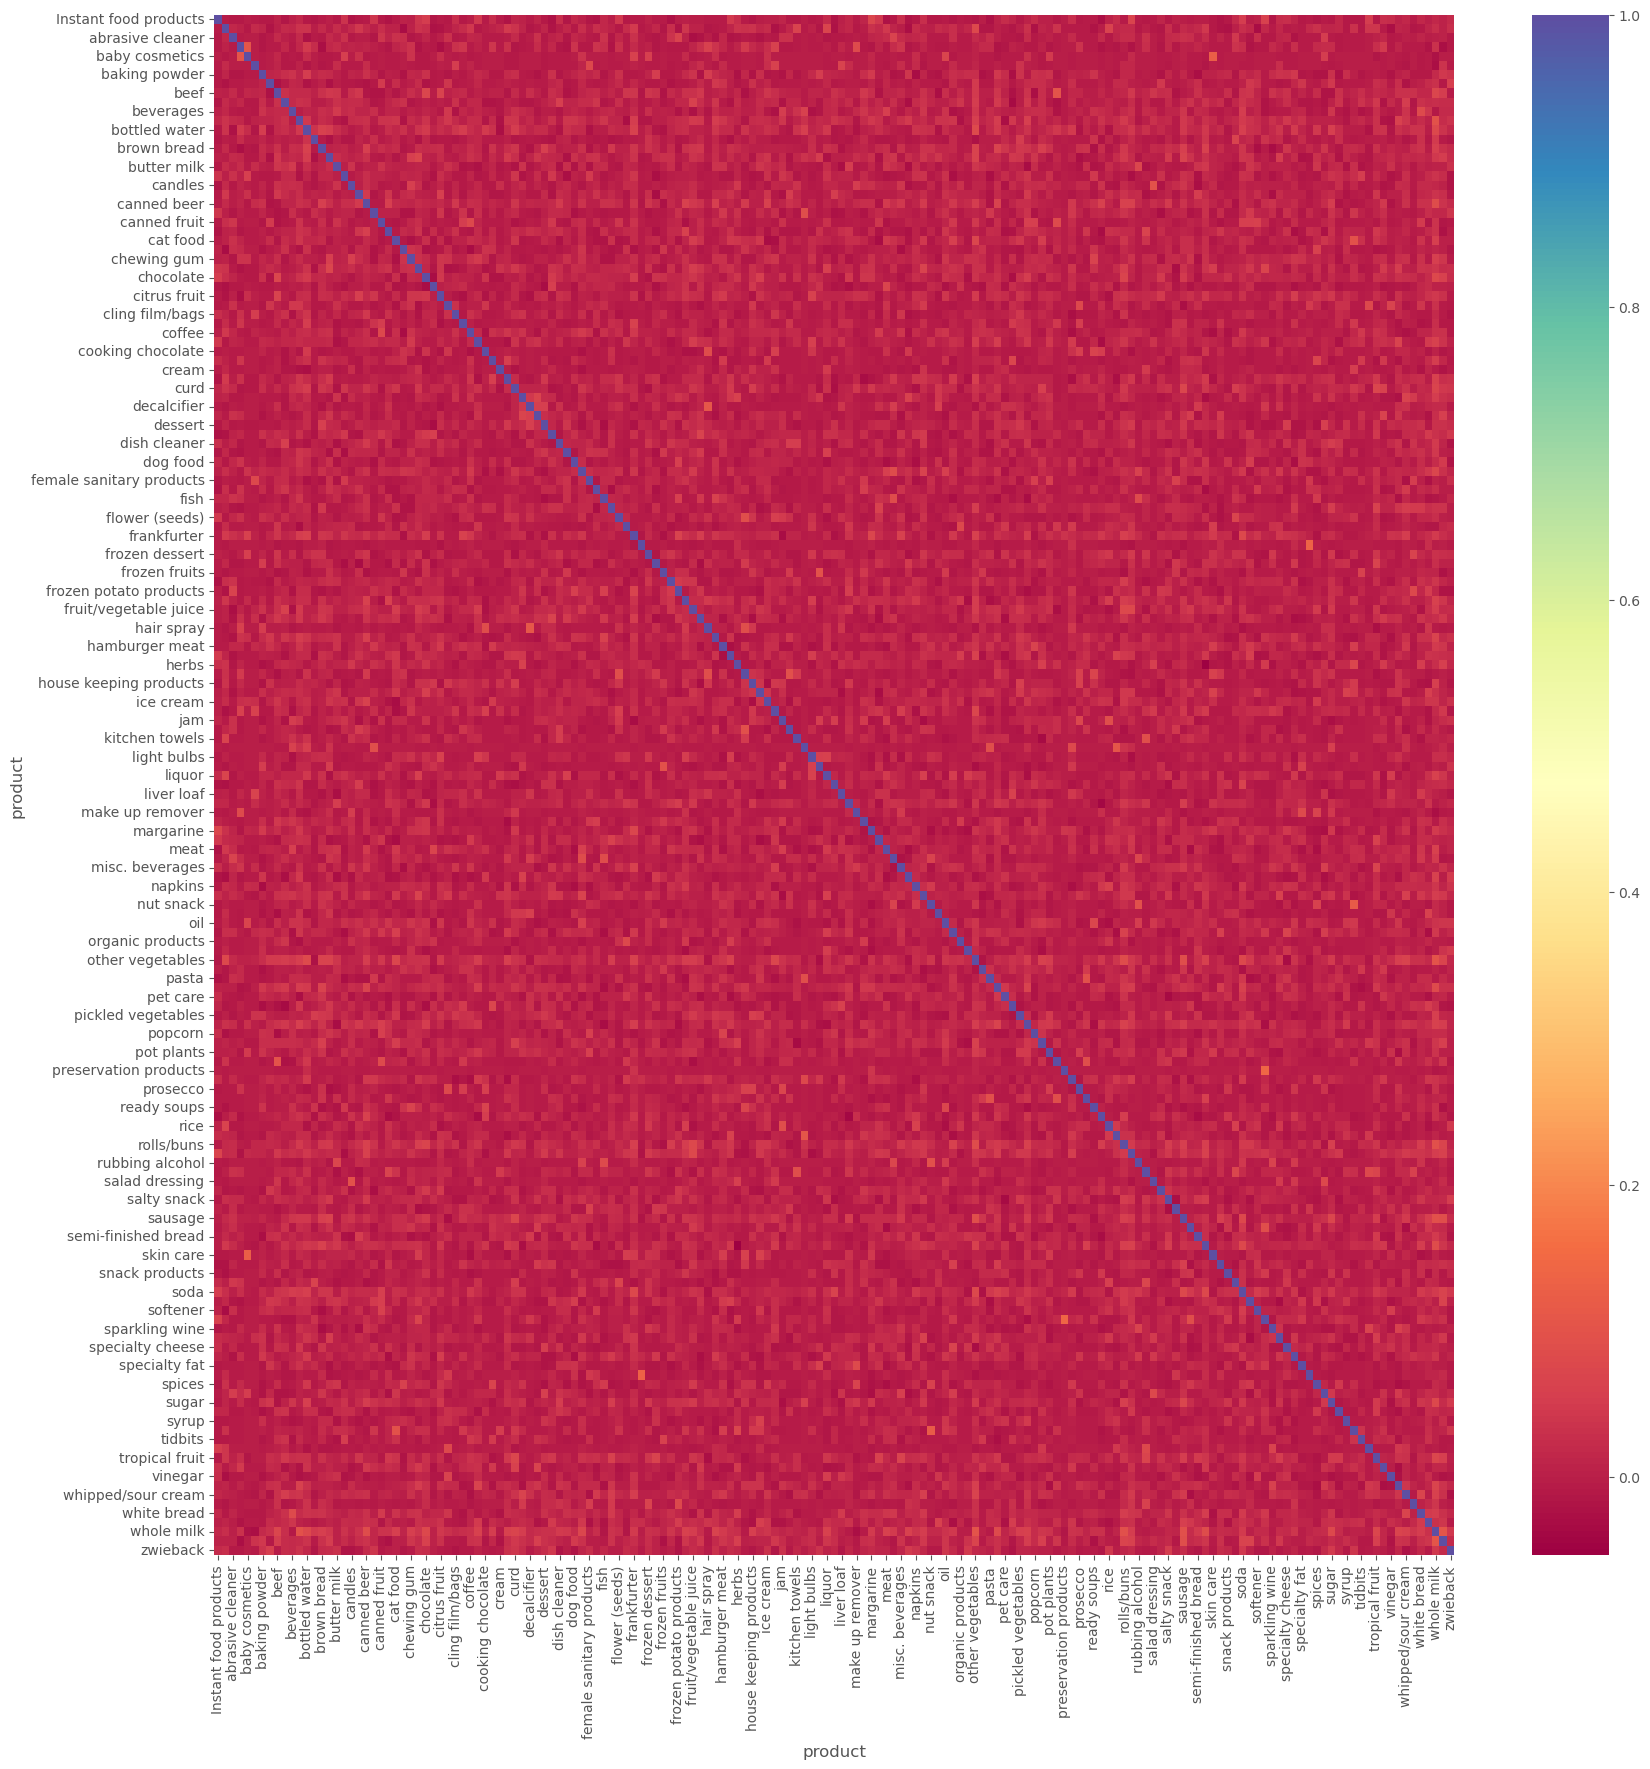

In [1164]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_corr, cmap='Spectral')

Какие продукты сильнее всего коррелируют с яйцами, `domestic eggs` (их чаще всего покупают вместе)? Какие продукты "мешают" купить яйца, то есть отрицательно коррелируют с их покупкой? 

In [1165]:
df_corr['domestic eggs'].sort_values(ascending=False)[:5]

product
domestic eggs      1.000000
meat spreads       0.083607
whole milk         0.072512
newspapers         0.064502
rubbing alcohol    0.060533
Name: domestic eggs, dtype: float64

***Больше всего с яйцами коррелируют такие продукты, как котлеты, молоко, газеты, алкоголь***

In [1166]:
df_corr['domestic eggs'].sort_values()[:5]

product
pet care            -0.024206
cooking chocolate   -0.023280
ready soups         -0.023280
dessert             -0.021004
cream               -0.020814
Name: domestic eggs, dtype: float64

***Мешают покупать яйца такие продукты, как pet care, cooking chocolate, ready soups, dessert, cream***

Какие два продукта коррелируют сильнее всего? 

In [1167]:
df_pivot.corr().unstack().sort_values(ascending=False).drop_duplicates()[:10]
# Источник: https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

product                product              
Instant food products  Instant food products    1.000000
soups                  preservation products    0.143465
frozen chicken         specialty vegetables     0.133211
skin care              baby cosmetics           0.127489
nut snack              tea                      0.117578
hair spray             decalcifier              0.109054
roll products          kitchen utensil          0.106653
artif. sweetener       baby cosmetics           0.105251
whole milk             yogurt                   0.103533
potato products        beef                     0.101892
dtype: float64

***Больше всего между мобой коррелируют супы и продукты консервации***

__Вопрос:__ почему корреляция пирсона это плохой способ измерить взаимосвязть между покупками?

__Ответ:__ потому что корреляция пирсона не позволяет понять причинно следственные связи и однозначно сказать, какой именно продукт коррелирует с другим. Если говорить про результаты нашего эксперимента, то, если больше всего между собой коррелируют супы и продукты консервации, то нельзя однозначать сказать: люди берут продукты консервации вместе с супами или супы, когда покупают продукты консервации


## 2.2 Коэффициент корреляции Мэтьюса

__Коэффициент корреляции Мэтьюса__ — это мера силы взаимосвязи между двумя бинарными переменными. Для того чтобы его вычислить, необходимо использовать таблицу сопряженности

|        |  $0$   |  $1$   |
|:------:|:------:|:------:|
| $0$    |  $a$   |  $b$   |
| $1$    |  $c$   |  $d$   |

В строках таблицы сопряжённости находятся значения одного признака, по столбцам — второго, в каждой ячейке — количество объектов, на которых реализовалась эта пара. Коэффициент корреляции Мэтьюса вычисляется по данным из таблицы сопряжённости следующим образом:

$$
MCC(X_1, X_2) = \frac{a \cdot d - b \cdot c}{\sqrt{(a + b) \cdot (a + c) \cdot (b + d) \cdot (c + d)}}
$$

Точно так же, как и коэффициенты Пирсона и Спирмена, корреляция Мэтьюса лежит в диапазоне от $−1$ до $1.$ Нулевое значение соответсвуте отсутствию взаимосвязи между переменными. Значение $MCC(X_1, X_2) = 1$ соотвествует случаю, когда $X_1$ и $X_2$ полностью совпадают, то есть $b = c = 0$. Значение  $MCC(X_1, X_2) = -1$ соответствует случаю, когда каждое значение $X_1$ отличается от каждого значения $X_2$. 

Для категориальных переменных можно также считать коэффициент V-Крамера. Подробнее можно почитать про разные корреляции [в этом конспекте.](https://disk.yandex.ru/i/Znahvyg3mIrW9A)

__в) [10 баллов]__ 

1. Оставьте в таблице сопряжённости два значения. Нулевое, если товара не был в чеке и единичное, если был
2. Отфильтруйте из рассмотрения товары, которые встречались меньше, чем в 10 чеках (оставить то, что `>= 10`)
3. Посчитайте для каждой пары коэффициент корреляции Мэтьюса. Чтобы удобнее было перебрать все сочетания, используйте `combinations` из модуля `itertools`.
4. Запишите получившиеся результаты в таблицу с колонками `product_1, product_2, matthews_corrcoef`. 
5. Отсортируйте получившиеся пары по коэффициенту Мэтьюса от 1 к -1 и сохраните первые сто строк получившейся таблички в файл `result_matthews.csv` Таблица должна быть без индексов. Последняя строка не должна быть пустой. Колонки друг от друга отделяются запятыми.

In [1168]:
from sklearn.metrics import matthews_corrcoef
df_pivot_copy = df_pivot.copy(deep=True) #создаю копию таблицы, потому что она понадобится позже
df_pivot[df_pivot > 1] = 1 #оставляю в таблице сопряженности только два значения
sorting = pd.DataFrame(df_pivot.sum() >= 10).T #нахожу те продукты, которые встречаются в чеке более 10 раз
sorting = sorting[sorting == True] #делаю так, чтобы в продуктах, которые встречаются в чеке менее 10 раз, стояло значение NaN
sorting = sorting.dropna(axis=1) #удаляю все столбцы, в которых значение NaN
sorting #смотрю, что получилось

product,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,...,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,white bread,white wine,whole milk,yogurt,zwieback
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [1169]:
df_pivot = df_pivot[sorting.columns] #оставляю в таблице только те столбцы, которые отвечаю за продукты, встречавшиееся в чеках 
# более 10 раз
df_pivot  #смотрю, что получилось

product,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,...,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,white bread,white wine,whole milk,yogurt,zwieback
id,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Для понмания, посчитаем коэффициент корреляции для чего-то одного:

In [1170]:
matthews_corrcoef(df_pivot['Instant food products'], df_pivot['beef'])

0.01173565303284228

Посмотрим, как работает itertools:

In [1171]:
from itertools import combinations
combo = list(combinations(df_pivot.columns, 2)) #задаю все компинации по два товара
res, product1, product2 = [], [], []
for k in combo: #создаю цикл, который записывает результаты подсчета корреляции в переменную res
    res.append(matthews_corrcoef(df_pivot[k[0]], df_pivot[k[1]]))
    product1.append(k[0]) #сюда записывается первый коррелируемый продукт
    product2.append(k[1]) #сюда записывается второй коррелируемый продукт
res[:10]

[-0.005501854463764765,
 -0.009419819829103204,
 -0.010824872109483526,
 -0.010363427681535723,
 -0.00827514818084059,
 0.01173565303284228,
 -0.013743883869401985,
 0.002374957806994147,
 0.008392984105882604,
 -0.009262214137721785]

In [1172]:
df_matthews = pd.DataFrame({'product_1':product1, 'product_2':product2, 'matthews_corrcoef':res}) #делаю из полученного таблицу
df_matthews

,product_1,product_2,matthews_corrcoef
0,Instant food products,UHT-milk,-0.005502
1,Instant food products,abrasive cleaner,-0.009420
2,Instant food products,artif. sweetener,-0.010825
3,Instant food products,baking powder,-0.010363
4,Instant food products,bathroom cleaner,-0.008275
...,...,...,...
11776,white wine,yogurt,0.042513
11777,white wine,zwieback,-0.006570
11778,whole milk,yogurt,0.093302
11779,whole milk,zwieback,0.035588


In [1173]:
df_matthews.sort_values(by='matthews_corrcoef', inplace=True, ascending=False) #сортирую по убыванию
df_matthews.reset_index(inplace=True, drop=True)
df_matthews

,product_1,product_2,matthews_corrcoef
0,nut snack,tea,0.117578
1,flower (seeds),honey,0.095058
2,sausage,yogurt,0.094040
3,honey,ketchup,0.093365
4,whole milk,yogurt,0.093302
...,...,...,...
11776,pet care,salty snack,-0.033813
11777,kitchen towels,pork,-0.034400
11778,berries,photo/film,-0.034996
11779,long life bakery product,red/blush wine,-0.037910


In [1174]:
df_matthews[:100].to_csv("result_matthews.csv", index=False) #экспортирую таблицу, чтобы выгрузить в контест

Отправьте свой файл `result_mat.csv` в контест (https://contest.yandex.ru/contest/47242/problems/B/) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.

> __Дисклеймер:__ Успешная посылка в контесте является обязательным условием получения полного балла за этот (и следующий) пункт. Если добиться успешной посылки не удастся, баллы будут выставляться на усмотрение проверяюшего.

> При этом ОК в контесте не гарантирует полный балл. Оценка всё равно может быть снижена в случае обнаружения неэффективностей или ошибок в коде. Если вы сдадите в AnyTask очевидно неработающий код или ноутбук без кода, но при этом в контест будет сдан корректный файл, то это будет расцениваться как плагиат. На всякий случай просим вас сдать вместе с ноутбуком файл res_fall.csv в anytask.

__Никнейм__: rasokurov@edu.hse.ru

__Ссылка__: https://contest.yandex.ru/contest/47242/run-report/84985910/

## 2.3 Независимость событий

 Конечно же, корреляция — это [не единственный способ искать](https://habr.com/ru/company/ods/blog/353502/) между покупками ассоциативные правила. Давайе попробуем другой подход.

Мы знаем, что события $A$ и $B$ называются независимыми, если $P(AB) = P(A)\cdot P(B)$. Отталкиваясь от этого определения, можно ввести другую характеристику, которая показывает, насколько продукты зависят друг от друга, а именно __поддержку (lift).__ 

$$
lift = \frac{P(AB)}{P(A)\cdot P(B)}
$$

Эта метрика описывает отношение зависимости товаров к их независимости. Если оказалось, что `lift = 1`, это означает, что покупка товара $A$ не зависит от покупки товара $B$. Если `lift > 1`, то это означает, что вероятность встретить оба товара в чеке, $P(AB)$ высокая, то есть товары покупают вместе. Если `lift < 1`, это означает, что товары, наоборот, очень часто покупают по-отдельности. 

__г) [5 баллов]__ Посчитайте значение нашей метрики для яиц и молока (`'whole milk', 'domestic eggs'`).

> Вам аккуратно нужно сделать три среза по условию  `>= 1`. Там, где пара надо делать срез так, чтобы оба товара дали `True`. Сделать это в одну строку вам поможет метод `.all(axis=1)`. Частоты можно получить методом `.mean()`, так как python думает, что `False` - это ноль, а `True` - это единица.

In [1175]:
def lift(frame, pro1, pro2): #задаю функцию, которая поможет мне считать lift
    return (frame[[pro1, pro2]].all(axis=1) >= 1).mean()/((frame[pro1] >= 1).mean() * (frame[pro2] >= 1).mean())
    

In [1176]:
lift(df_pivot, 'whole milk','domestic eggs') #подставляю в сделанную функцию необходимые значения

1.152241691425711

***Для 'whole milk' и 'domestic eggs' значение нашей метрики будет равно  1.152241691425711***

__д) [10 баллов]__ 

1. Оставьте в таблице сопряжённости два значения. Нулевое, если товара не был в чеке и единичное, если был
2. Отфильтруйте из рассмотрения товары, которые встречались меньше, чем в 10 чеках (оставить то, что `>= 10`)
3. Посчитайте для каждой пары значение поддержки, `lift`. Чтобы удобнее было перебрать все сочетания, используйте `combinations` из модуля `itertools`.
4. Запишите получившиеся результаты в таблицу с колонками `product_1, product_2, lift`. 
5. Отсортируйте получившиеся пары по значению lift от больших к меньшим и сохраните первые сто строк получившейся таблички в файл `result_lift.csv` Таблица должна быть без индексов. Последняя строка не должна быть пустой. Колонки друг от друга отделяются запятыми.

In [1177]:
df_pivot #смотрю, что у меня уже есть таблица, в которой товары уже отфильтрованы так, как требуется в условии

product,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,...,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,white bread,white wine,whole milk,yogurt,zwieback
id,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1178]:
combo = list(combinations(df_pivot.columns, 2)) #реализую тот же самый цикл, что и в 2.2) но с собственно-заданной функцией
res, product1, product2 = [], [], []
for k in combo:
    pro1 = str(k[0])
    pro2 = str(k[1])
    res.append(lift(df_pivot, pro1, pro2))
    product1.append(k[0])
    product2.append(k[1])
res[:10] #записываю в res результат и смотрю, что получилось

[0.8492374727668844,
 0.0,
 0.0,
 0.5369146005509642,
 0.0,
 1.2547210300429186,
 0.6266881028938908,
 1.0738292011019284,
 1.1544964997307485,
 0.8579031612645057]

In [1179]:
df_lift = pd.DataFrame({'product_1':product1, 'product_2':product2, 'lift':res}) #формирую из полученных данных таблицу
df_lift

,product_1,product_2,lift
0,Instant food products,UHT-milk,0.849237
1,Instant food products,abrasive cleaner,0.000000
2,Instant food products,artif. sweetener,0.000000
3,Instant food products,baking powder,0.536915
4,Instant food products,bathroom cleaner,0.000000
...,...,...,...
11776,white wine,yogurt,1.314976
11777,white wine,zwieback,0.755426
11778,whole milk,yogurt,1.161510
11779,whole milk,zwieback,1.309518


In [1180]:
df_lift.sort_values(by='lift', inplace=True, ascending=False) #сортирую по убыванию
df_lift.reset_index(inplace=True, drop=True) #привожу в порядок индексы
df_lift # смотрю, что получлось

,product_1,product_2,lift
0,flower soil/fertilizer,organic products,24.362500
1,honey,ready soups,19.989744
2,nut snack,tea,19.686869
3,honey,ketchup,18.740385
4,cooking chocolate,ready soups,17.324444
...,...,...,...
11776,female sanitary products,seasonal products,0.000000
11777,nuts/prunes,specialty fat,0.000000
11778,nuts/prunes,specialty vegetables,0.000000
11779,nuts/prunes,spices,0.000000


In [1181]:
df_lift[:100].to_csv("result_lift.csv", index=False) # экспортирую таблицу, чтобы выгрузить в контест

__Никнейм__: rasokurov@edu.hse.ru

__Ссылка__: https://contest.yandex.ru/contest/47242/run-report/84989117/

Отправьте свой файл `result_lift.csv` в контест (https://contest.yandex.ru/contest/47242/problems/C/) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.

> __Дисклеймер:__ Успешная посылка в контесте является обязательным условием получения полного балла за этот (и следующий) пункт. Если добиться успешной посылки не удастся, баллы будут выставляться на усмотрение проверяюшего.

> При этом ОК в контесте не гарантирует полный балл. Оценка всё равно может быть снижена в случае обнаружения неэффективностей или ошибок в коде. Если вы сдадите в AnyTask очевидно неработающий код или ноутбук без кода, но при этом в контест будет сдан корректный файл, то это будет расцениваться как плагиат. На всякий случай просим вас сдать вместе с ноутбуком файл res_fall.csv в anytask.

__е) [5 баллов]__ Давайте проинтепретируем результаты.

- Посмотрите на 10 пар продуктов с самой высокой корреляцией Мэтьюса и на 10 пар с самой низкой. Проинтерпретируйте, насколько эта корреляция логична? Придумайте ситуации, когда какие-то из пар могли бы покупаться вместе.
- Посмотрите на 10 пар продкутов с самым высоким lift, насколько логично они выделились? 
- Насколько большим оказалось пересечение двух методов? Как думаете, почему? А если взять первые сто пар?

__Ответы:__  ваш текст

In [1182]:
df_matthews.sort_values(by='matthews_corrcoef', ascending=False).loc[:10]

,product_1,product_2,matthews_corrcoef
0,nut snack,tea,0.117578
1,flower (seeds),honey,0.095058
2,sausage,yogurt,0.094040
3,honey,ketchup,0.093365
4,whole milk,yogurt,0.093302
5,kitchen towels,rum,0.089588
6,jam,rice,0.088470
7,canned fruit,potato products,0.088020
8,cat food,tea,0.087834
9,fish,meat spreads,0.086703


Среди самых логичных пар из самых высококоррелируемых продуктов можно выделить ореховую закуску и чай, сосиски и йогурт, мед и кетчуп, цельное молоко и йогурт. 

- Ореховая закуска и чай: честно говоря, не очень представляю себе, что такое ореховая закуска, однако любую закуску приятнее пить с чаем, видимо, поэтому люди и берут их вместе. 

- Сосики и йогурт: сосиски и йогурт достаточно логичное сочетание, так как их можно употреблять как готовый бычтрый завтрак. Или же соски можно есть, например, с кашей и яичницей, съев также йогурт

- Мед и кетчуп: говоря об этом, я могу представить себе домохозяйку, которая готовится к приему гостей и закупает различного рода специи и соусы для своего блюда. Для этого как раз и может понадобиться мед и кетчуп. Другой же вариант - та же домохохяйка зашла в магазин, чтобы восполнить запас регулярно потребляемых проудктов. Она купила пельмени, чай, кетчуп к пельменям и мед к чаю

- Цельное молоко и йогурт: самое логичное сочетание, так как йогурт является молочным продуктом, также он часто употребляется на завтрак или в качестве перекуса. И если уж покупатель подходит к молочному прилавку взять молоко, он с высокой долей вероятности возьмет еще и вкусный и недорогой йогурт

In [1183]:
df_matthews.sort_values(by='matthews_corrcoef')[:10]

,product_1,product_2,matthews_corrcoef
11780,herbs,shopping bags,-0.052079
11779,long life bakery product,red/blush wine,-0.037910
11778,berries,photo/film,-0.034996
11777,kitchen towels,pork,-0.034400
11776,pet care,salty snack,-0.033813
11775,meat,mustard,-0.033340
11774,hygiene articles,mayonnaise,-0.032691
11773,red/blush wine,semi-finished bread,-0.032391
11772,liquor,pip fruit,-0.032196
11771,pip fruit,soups,-0.032088


- Как видно, наибольшая дискорреляция, наблюдается у трав и сумок для покупок. Тут у меня два предположения: если человек покупает только травы, то вряд ли ему нужна сумка для покупок, так как травы достаточно мало весят и компактны. Для их переноски не требуется пакет. Второе предположение - что, возможно, травы часто покупают вегетерианцы, которые чаще еще и эко-активисты, отчего они не покупают сумки для покупок, а носят их с собой, чтобы беречь природу

- По поводу остальных пар: моя гипотеза заключается в том, что здесь по большей части представлены продукты, которое не совмещаются при походе в супермакрет с конкретной целью. Например, можно зайти в супермакрет основательно закупиться едой на ближайшую неделю, можно зайти в супермаркет купить еду на обед в обеденный перерыв, можно зайти в супермакрет у дома после работы, купить сладости и пиво и т.д. Так, например, редко в супермаркет ходят, чтобы взять снеки и корм для животных. Так как снеки берут отдельно перед встрейчей с друзьми, а корм для питомцев отдельно. Также редко вместе берут хлеб и вино, так как хлеб покупается при основательных закупках на неделю, а вино перед каким-то событием.

In [1184]:
df_lift[:10]

,product_1,product_2,lift
0,flower soil/fertilizer,organic products,24.362500
1,honey,ready soups,19.989744
2,nut snack,tea,19.686869
3,honey,ketchup,18.740385
4,cooking chocolate,ready soups,17.324444
5,canned fruit,potato products,16.874459
6,frozen fruits,tidbits,16.107438
7,honey,prosecco,15.781377
8,honey,skin care,14.992308
9,cooking chocolate,prosecco,13.677193


На самом деле, в случае с lift есть логически объяснимые пары, о которых я говорил раньше, например, ореховые закуски и чай, мед и кетчуп, но есть и те, которые трудено объяснить, например, мед и уход за кожей (если тут имеется в виду съедобный мед), шоколад и готовые супы, мед и просекко. В целом, достаточно не очень логичные пары тут получились

Если сравнивать два метода, исходя из наибольших корреляций, то можн сказать, что совпадения имеются, их достаточно много. Примерно треть пар, которые есть в lift также наблюдались и в корреляции мэттьюса. Если говорить о 100 случаях, то это уже надо проверять:

In [1185]:
df_lift['pair'] = df_lift['product_1'] + df_lift['product_2']
df_matthews['pair'] = df_matthews['product_1'] + df_matthews['product_2']
len(set(df_matthews['pair'][:100].values)&set(df_lift['pair'][:100].values))

34

Если брать 100 первых пар, то совпадений 34. То есть пропорция сохраняется и опять примерно треть пар совпадает.

По большому счету, и тот и другой метод достаточно плохо считают корреляцию, о чем говорят странные сочетания пар, которые должны быть наиболее коррелированными. Поэтому результаты часто не совпадают, хотя в каждом третьем случае могут встречаться похожие корреляции

__ё) [бонусные 5 баллов]__ 

Иногда в чеках пытаются искать __продукты-якоря.__ То есть продукты, которые являются основными. Например: айфон - основной продукт, наушники и чехол - дополнения к нему. Предложите алгоритм поиска таких товаров, похожий на то, что мы делали выше. Реализуйте алгоритм поиска якорей, который вы придумали. 

__Ответ:__ ваш текст


In [ ]:
# your code here
# [̲̅$̲̅(̲̅5̲̅)̲̅$̲̅]